# COM BASE NOS RESULTADOS DE EXAMES LABORATORIAIS COLETADOS PARA CASOS SUSPEITOS DE COVID-19 DURANTE VISITA À SALA DE EMERGÊNCIA, SERIA POSSIVEL PREVER O RESULTADO DO TESTE (POSITIVO / NEGATIVO) ?****

# # Cientista de Dados: Romulo Siqueira Santos
# # Base de Dados: Hospital Israelita Albert Einstein

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/covid19/dataset.xlsx


In [2]:
#Bibliotecas necesárias para análise
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn import linear_model


import scipy as sp
from scipy.stats import norm

from IPython.core.pylabtools import figsize


from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.metrics import r2_score, make_scorer, mean_squared_error, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

import plotly
import plotly as py
import plotly.graph_objs as go
import plotly.offline as py
plotly.offline.init_notebook_mode(connected=True)
from plotly.offline import plot, iplot


# EXPLORAÇÃO E NORMALIZAÇÃO DOS DADOS ****

In [3]:
dados = pd.read_excel('/kaggle/input/covid19/dataset.xlsx')

In [4]:
dados.head(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dados.tail(5)

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5643,2697fdccbfeb7f7,19,positive,0,0,0,0.694287,0.541564,-0.906829,-0.325903,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
list(dados.columns.values)

['Patient ID',
 'Patient age quantile',
 'SARS-Cov-2 exam result',
 'Patient addmited to regular ward (1=yes, 0=no)',
 'Patient addmited to semi-intensive unit (1=yes, 0=no)',
 'Patient addmited to intensive care unit (1=yes, 0=no)',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)',
 'Serum Glucose',
 'Respiratory Syncytial Virus',
 'Influenza A',
 'Influenza B',
 'Parainfluenza 1',
 'CoronavirusNL63',
 'Rhinovirus/Enterovirus',
 'Mycoplasma pneumoniae',
 'Coronavirus HKU1',
 'Parainfluenza 3',
 'Chlamydophila pneumoniae',
 'Adenovirus',
 'Parainfluenza 4',
 'Coronavirus229E',
 'CoronavirusOC43',
 'Inf A H1N1 2009',
 'Bordetella pertussis',
 'Metapneumovirus',
 'Parainfluenza 2',
 'Neutrophils',
 'Urea',

In [7]:
dados.shape

(5644, 111)

In [8]:
print('No. de atributos categóricos: ', dados.select_dtypes(exclude = ['int64','float64']).columns.size)

No. de atributos categóricos:  37


In [9]:
print('No. de atributos numéricos: ', dados.select_dtypes(exclude = ['object']).columns.size)

No. de atributos numéricos:  74


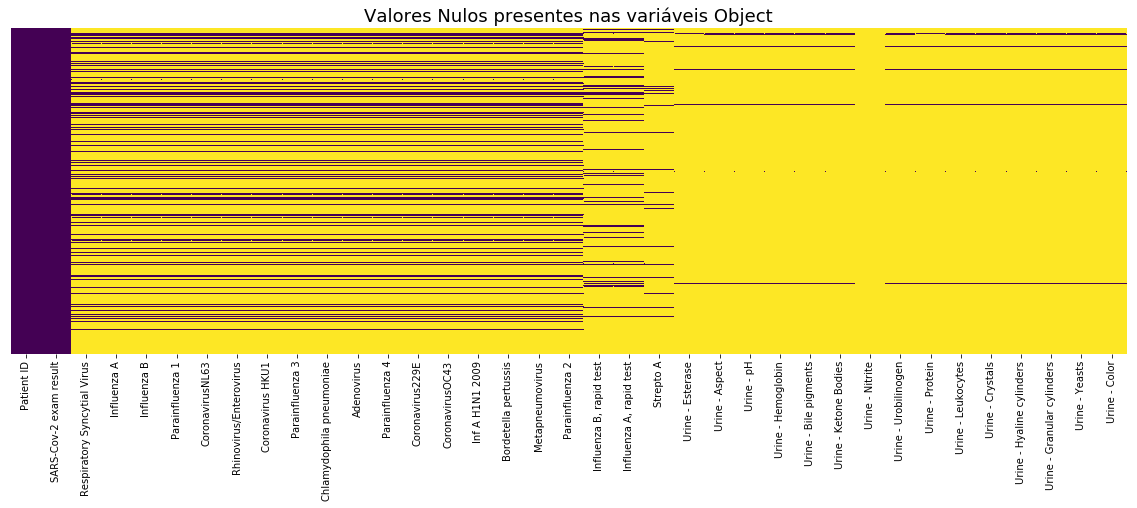

In [10]:
plt.figure(figsize=(20,6))
sns.heatmap(dados.select_dtypes(include=['object']).isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.title('Valores Nulos presentes nas variáveis Object',fontsize=18)
plt.show()

In [11]:
dados.select_dtypes(include=['object'])

,Patient ID,SARS-Cov-2 exam result,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Coronavirus HKU1,Parainfluenza 3,...,Urine - Ketone Bodies,Urine - Nitrite,Urine - Urobilinogen,Urine - Protein,Urine - Leukocytes,Urine - Crystals,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color
0,44477f75e8169d2,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,negative,not_detected,not_detected,not_detected,not_detected,not_detected,detected,not_detected,not_detected,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,absent,NaN,normal,absent,29000,Ausentes,absent,absent,absent,yellow


In [12]:
dados['SARS-Cov-2 exam result'].unique()

array(['negative', 'positive'], dtype=object)

In [13]:
dados.groupby(['SARS-Cov-2 exam result']).count()

,Patient ID,Patient age quantile,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
SARS-Cov-2 exam result,,,,,,,,,,,,,,,,,,,,,
negative,5086,5086,5086,5086,5086,520,520,519,518,519,...,14,14,14,14,14,14,14,11,19,14
positive,558,558,558,558,558,83,83,83,81,83,...,13,13,13,13,13,13,13,9,1,13


In [14]:
# 'SARS-Cov-2 exam result' #negativo 0 e positivo 1

def transforma(s):
        if s == 'negative':
            return 0
        elif s == 'positive':
            return 1
        
dados['SARS-Cov-2 exam result'] = dados['SARS-Cov-2 exam result'].apply(transforma)

In [15]:
dados.dtypes

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                     int64
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object

In [16]:
dados = dados.fillna(0)  #Preencher os valores nulos com 0 

In [17]:
dados.isnull().sum().sort_values(ascending=False)

ctO2 (arterial blood gas analysis)    0
Urea                                  0
Parainfluenza 3                       0
Chlamydophila pneumoniae              0
Adenovirus                            0
                                     ..
Urine - Nitrite                       0
Urine - Density                       0
Urine - Urobilinogen                  0
Urine - Protein                       0
Patient ID                            0
Length: 111, dtype: int64

In [18]:
#Exclusão de dados sem representatividade

dados.drop('Mycoplasma pneumoniae', axis = 1, inplace=True)
dados.drop('Fio2 (venous blood gas analysis)', axis = 1, inplace=True)
dados.drop('Promyelocytes', axis = 1, inplace=True)
dados.drop('Myeloblasts', axis = 1, inplace=True)
dados.drop('Partial thromboplastin time\xa0(PTT)\xa0', axis = 1, inplace=True)
dados.drop('Prothrombin time (PT), Activity', axis = 1, inplace=True)
dados.drop('D-Dimer', axis = 1, inplace=True)
dados.drop('Urine - Sugar', axis = 1, inplace=True)


In [19]:
def transformacao(s):
        if s == 'not_detected':
            return 0
        if s == 'None':
            return 0
        elif s == 'detected':
            return 1
        elif s == 'negative':
            return 0
        elif s == 'positive':
            return 1
        
#DICIONÁRIO DE DADOS: # 0 not-detected, 1 detected
dados['Respiratory Syncytial Virus'] = dados['Respiratory Syncytial Virus'].apply(transformacao)
dados['Influenza A'] = dados['Influenza A'].apply(transformacao)
dados['Influenza B'] = dados['Influenza B'].apply(transformacao)
dados['Parainfluenza 1'] = dados['Parainfluenza 1'].apply(transformacao)
dados['CoronavirusNL63'] = dados['CoronavirusNL63'].apply(transformacao)
dados['Rhinovirus/Enterovirus'] = dados['Rhinovirus/Enterovirus'].apply(transformacao)
dados['Coronavirus HKU1'] = dados['Coronavirus HKU1'].apply(transformacao)
dados['Parainfluenza 3'] = dados['Parainfluenza 3'].apply(transformacao)
dados['Chlamydophila pneumoniae'] = dados['Chlamydophila pneumoniae'].apply(transformacao)
dados['Adenovirus'] = dados['Adenovirus'].apply(transformacao)
dados['Parainfluenza 4'] = dados['Parainfluenza 4'].apply(transformacao)
dados['Coronavirus229E'] = dados['Coronavirus229E'].apply(transformacao)
dados['CoronavirusOC43'] = dados['CoronavirusOC43'].apply(transformacao)
dados['Inf A H1N1 2009'] = dados['Inf A H1N1 2009'].apply(transformacao)
dados['Bordetella pertussis'] = dados['Bordetella pertussis'].apply(transformacao)
dados['Metapneumovirus'] = dados['Metapneumovirus'].apply(transformacao)
dados['Parainfluenza 2'] = dados['Parainfluenza 2'].apply(transformacao)
    
    
#DICIONÁRIO DE DADOS: # 0 negative, 1 positive    
dados['Influenza B, rapid test'] = dados['Influenza B, rapid test'].apply(transformacao)
dados['Influenza A, rapid test'] = dados['Influenza A, rapid test'].apply(transformacao)


In [20]:
def transformacao_2(s):
        if s == 'not_done':
            return 0
        if s == 'None':
            return 0
        elif s == 'absent':
            return 1
        elif s == 'present':
            return 2
        elif s == 'negative':
            return 0
        elif s == 'positive':
            return 1
        elif s == 'Não Realizado':
            return 0
        
#DICIONÁRIO DE DADOS: # 0 = not-done, 1 = absent, 2 = present
dados['Urine - Hemoglobin'] = dados['Urine - Hemoglobin'].apply(transformacao_2)
dados['Urine - Esterase'] = dados['Urine - Esterase'].apply(transformacao_2)
dados['Urine - pH'] = dados['Urine - pH'].apply(transformacao_2)
#dados['Urine - Hemoglobin'] = dados['Urine - Hemoglobin'].apply(transformacao_2)
dados['Urine - Bile pigments'] = dados['Urine - Bile pigments'].apply(transformacao_2)
dados['Urine - Ketone Bodies'] = dados['Urine - Ketone Bodies'].apply(transformacao_2)
dados['Urine - Nitrite'] = dados['Urine - Nitrite'].apply(transformacao_2)
dados['Urine - Protein'] = dados['Urine - Protein'].apply(transformacao_2)
dados['Urine - Hyaline cylinders'] = dados['Urine - Hyaline cylinders'].apply(transformacao_2)
dados['Urine - Granular cylinders'] = dados['Urine - Granular cylinders'].apply(transformacao_2)
dados['Urine - Yeasts'] = dados['Urine - Yeasts'].apply(transformacao_2)


#DICIONÁRIO DE DADOS: # 0 negative, 1 positive
dados['Strepto A'] = dados['Strepto A'].apply(transformacao_2)  

In [21]:
def transformacao_3(s):
        if s == 'clear':
            return 1
        elif s == 'cloudy':
            return 2
        elif s == 'altered_coloring':
            return 3
        elif s == 'lightly_cloudy':
            return 4
        elif s == 'light_yellow':
            return 1
        elif s == 'yellow':
            return 2
        elif s == 'orange':
            return 3
        elif s == 'citrus_yellow':
            return 4
        elif s == 'normal':
            return 1
        elif s == 'not_done':
            return 0
        elif s == 'Ausentes':
            return 1
        elif s == 'Urato Amorfo --+':
            return 2
        elif s == 'Oxalato de Cálcio +++':
            return 3
        elif s == 'Oxalato de Cálcio -++':
            return 4
        elif s == 'Urato Amorfo +++':
            return 5
        
        
        
#DICIONÁRIO DE DADOS: # 1'clear', 2'cloudy', 3'altered_coloring', 4'lightly_cloudy'
dados['Urine - Aspect'] = dados['Urine - Aspect'].apply(transformacao_3)      
        
#DICIONÁRIO DE DADOS: # 1'normal', 0'not_done'
dados['Urine - Urobilinogen'] = dados['Urine - Urobilinogen'].apply(transformacao_3)  

#DICIONÁRIO DE DADOS: # 1'Ausentes', 2'Urato Amorfo --+', 3'Oxalato de Cálcio +++',4'Oxalato de Cálcio -++', 5'Urato Amorfo +++'
dados['Urine - Crystals'] = dados['Urine - Crystals'].apply(transformacao_3)  

#DICIONÁRIO DE DADOS: # 1'light_yellow', 2'yellow', 3'orange', 4'citrus_yellow'
dados['Urine - Color'] = dados['Urine - Color'].apply(transformacao_3)

In [22]:
dados = dados.fillna(0)  #Preencher os valores nulos com 0 

In [23]:
# Foi analisado cada resultado únicos apresentados nas variáveis.

dados['Respiratory Syncytial Virus'].unique()

array([0., 1.])

In [24]:
dados['Urine - Hemoglobin'].unique()


array([0., 1., 2.])

In [25]:
dados['Urine - Leukocytes'].unique()


array([0, '38000', '5942000', '32000', '22000', '<1000', '3000', '16000',
       '7000', '5300', '1000', '4000', '5000', '10600', '6000', '2500',
       '2600', '23000', '124000', '8000', '29000', '2000', '624000',
       '40000', '3310000', '229000', '19000', '28000', '10000', '4600',
       '77000', '43000'], dtype=object)

In [26]:
#Transformando Urine - Leukocytes de Object para Numérico:

dados['Urine - Leukocytes'] = pd.to_numeric(dados['Urine - Leukocytes'], errors='coerce')

In [27]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 103 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(97), int64(5), object(1)
memory usage: 4.4+ MB


In [28]:
dados.select_dtypes(include=['object'])

,Patient ID
0,44477f75e8169d2
1,126e9dd13932f68
2,a46b4402a0e5696
3,f7d619a94f97c45
4,d9e41465789c2b5
...,...
5639,ae66feb9e4dc3a0
5640,517c2834024f3ea
5641,5c57d6037fe266d
5642,c20c44766f28291


In [29]:
dados['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

# **1. > 558 EXAMES DE SARS-COV-2 POSITIVOS> **

# EXPLORAÇÃO E VISUALIZAÇÃO SOBRE AS VARIÁVEIS  ******

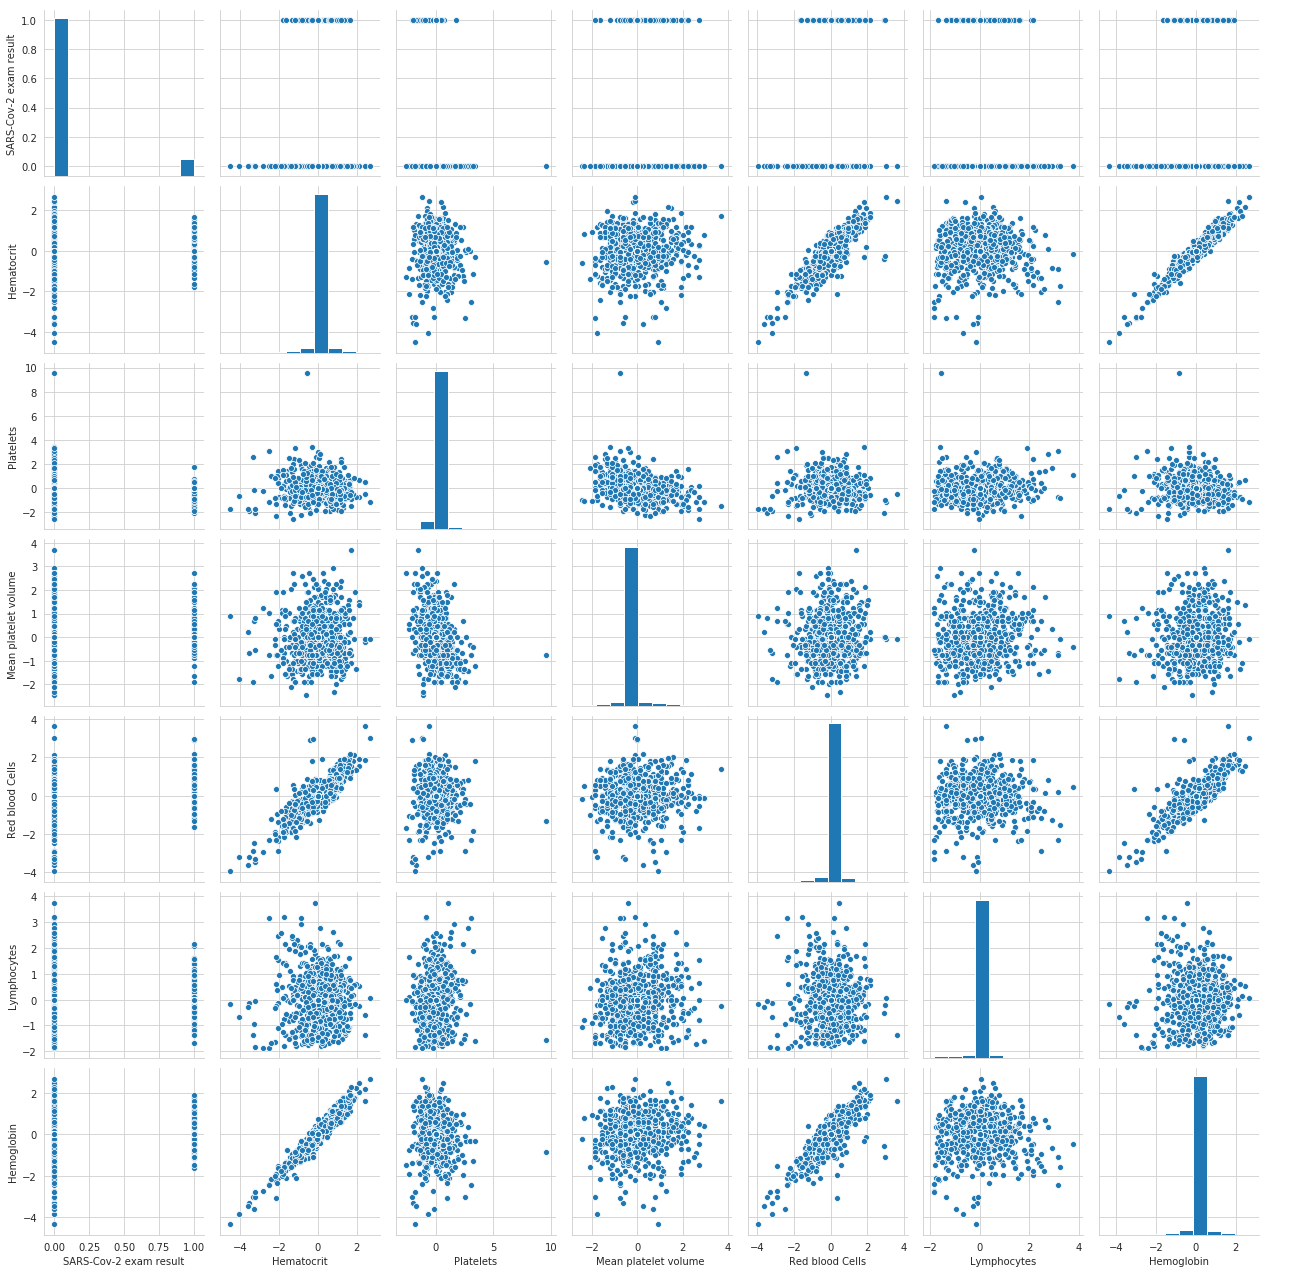

In [30]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Hematocrit', 'Platelets', 'Mean platelet volume ', 'Red blood Cells', 'Lymphocytes', 'Hemoglobin']
sns.pairplot(dados[cols])
plt.show()

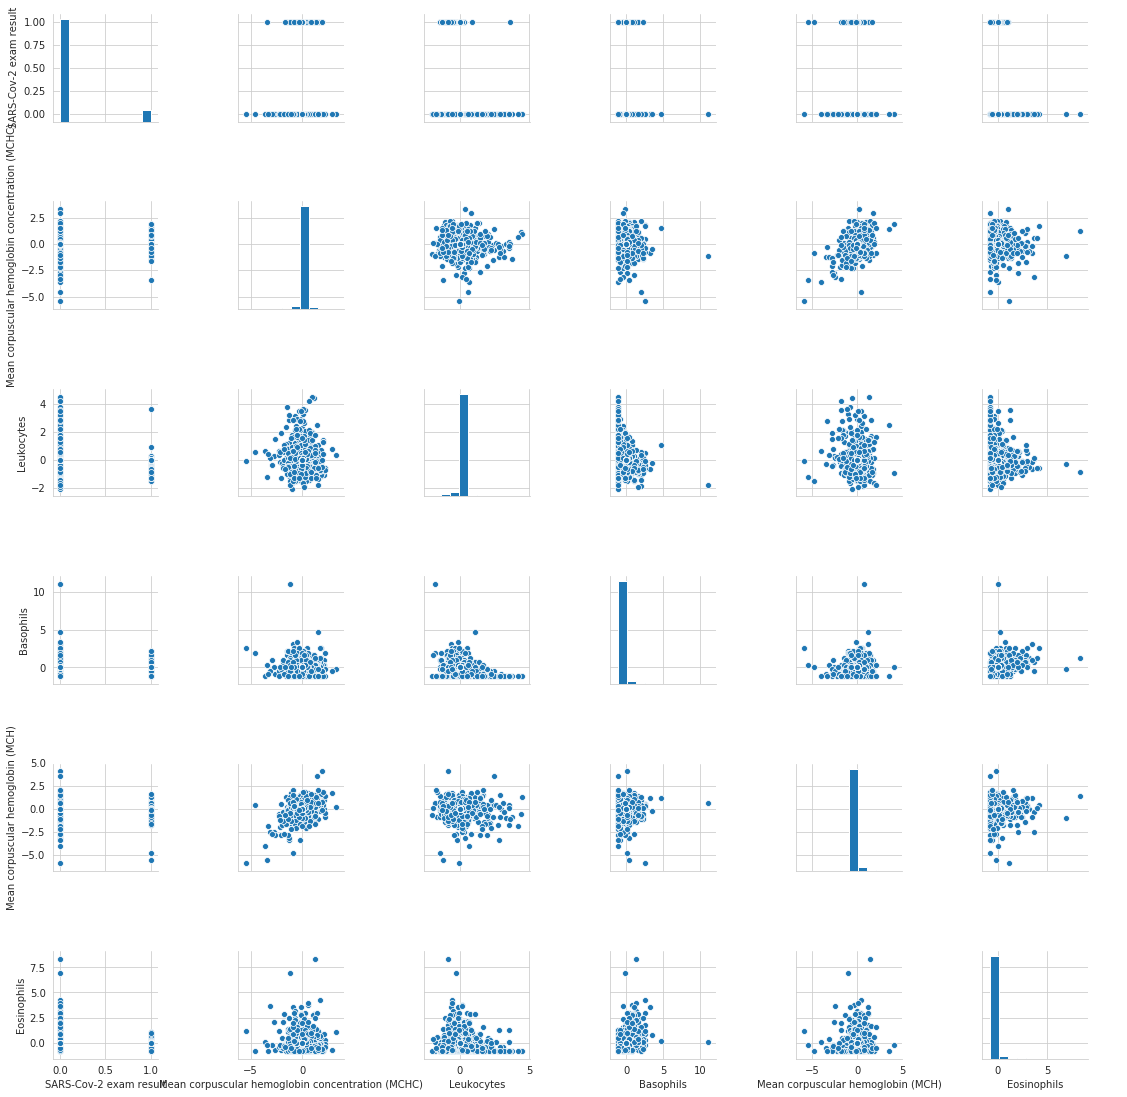

In [31]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Mean corpuscular hemoglobin concentration\xa0(MCHC)', 'Leukocytes', 'Basophils', 'Mean corpuscular hemoglobin (MCH)', 'Eosinophils']
sns.pairplot(dados[cols])
plt.show()

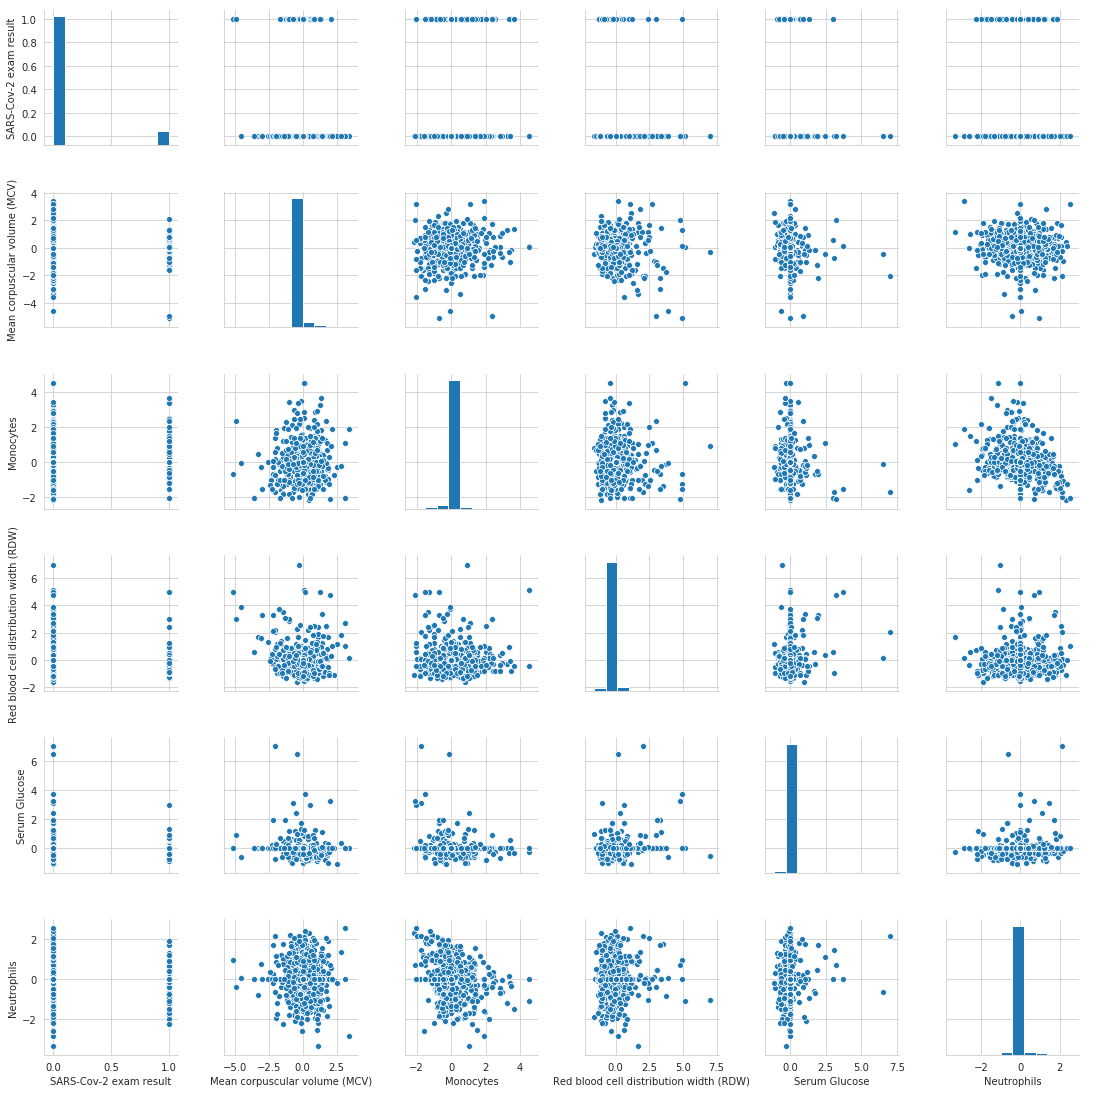

In [32]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Mean corpuscular volume (MCV)', 'Monocytes', 'Red blood cell distribution width (RDW)', 'Serum Glucose', 'Neutrophils']
sns.pairplot(dados[cols])
plt.show()

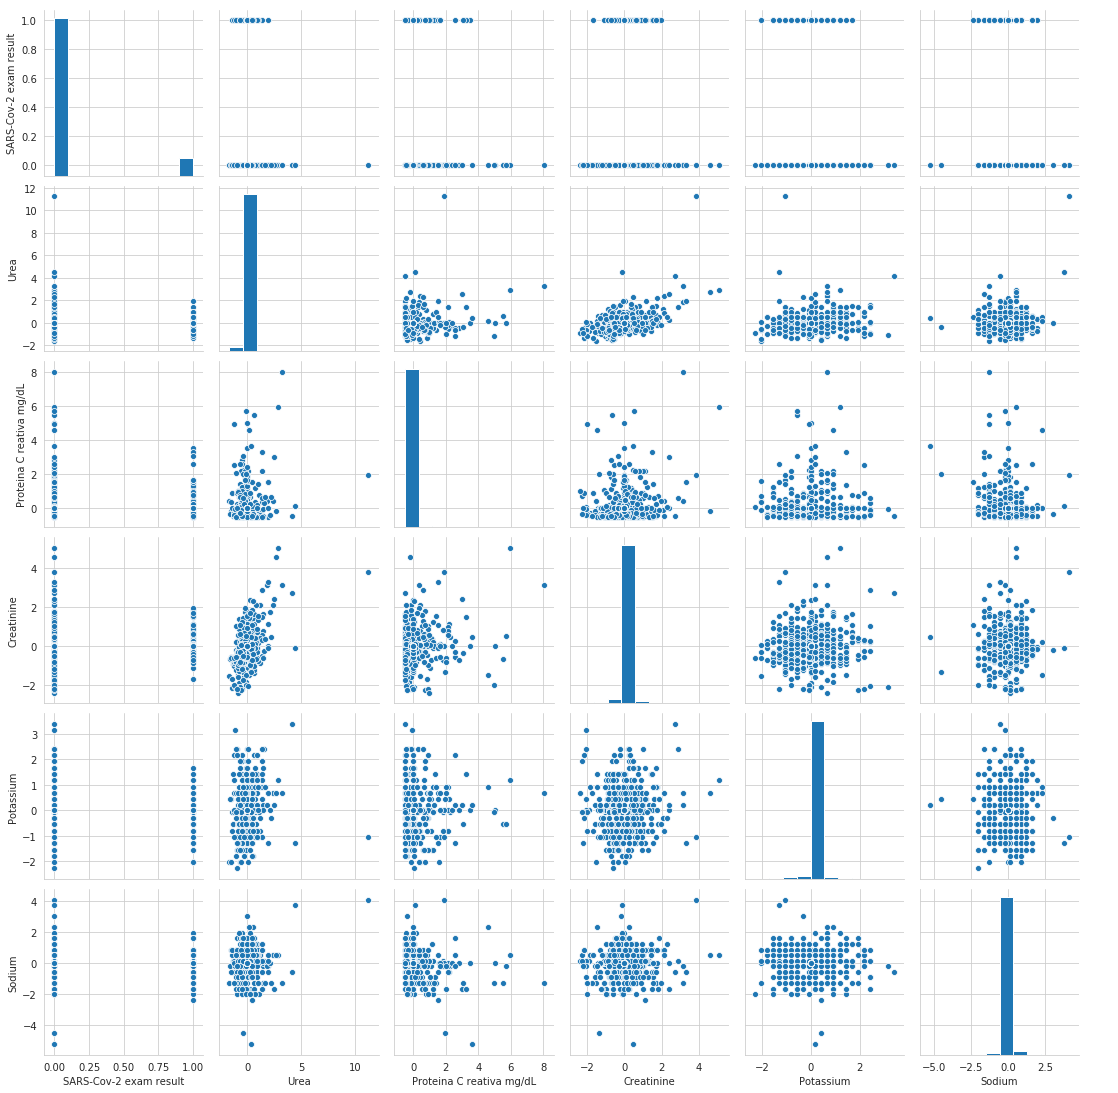

In [33]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Urea', 'Proteina C reativa mg/dL', 'Creatinine', 'Potassium', 'Sodium']
sns.pairplot(dados[cols])
plt.show()

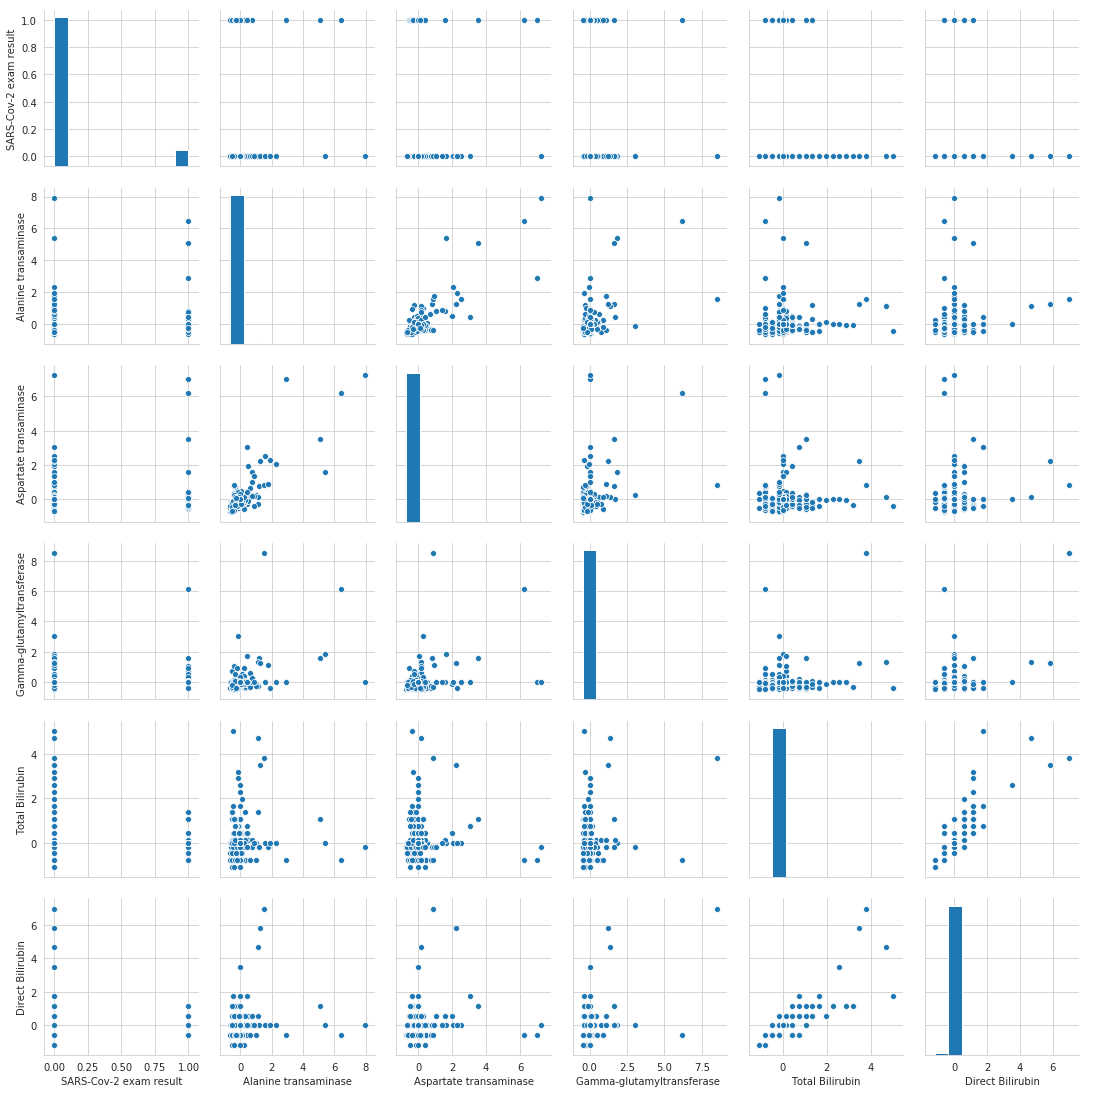

In [34]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Alanine transaminase', 'Aspartate transaminase', 'Gamma-glutamyltransferase\xa0', 'Total Bilirubin', 'Direct Bilirubin']
sns.pairplot(dados[cols])
plt.show()

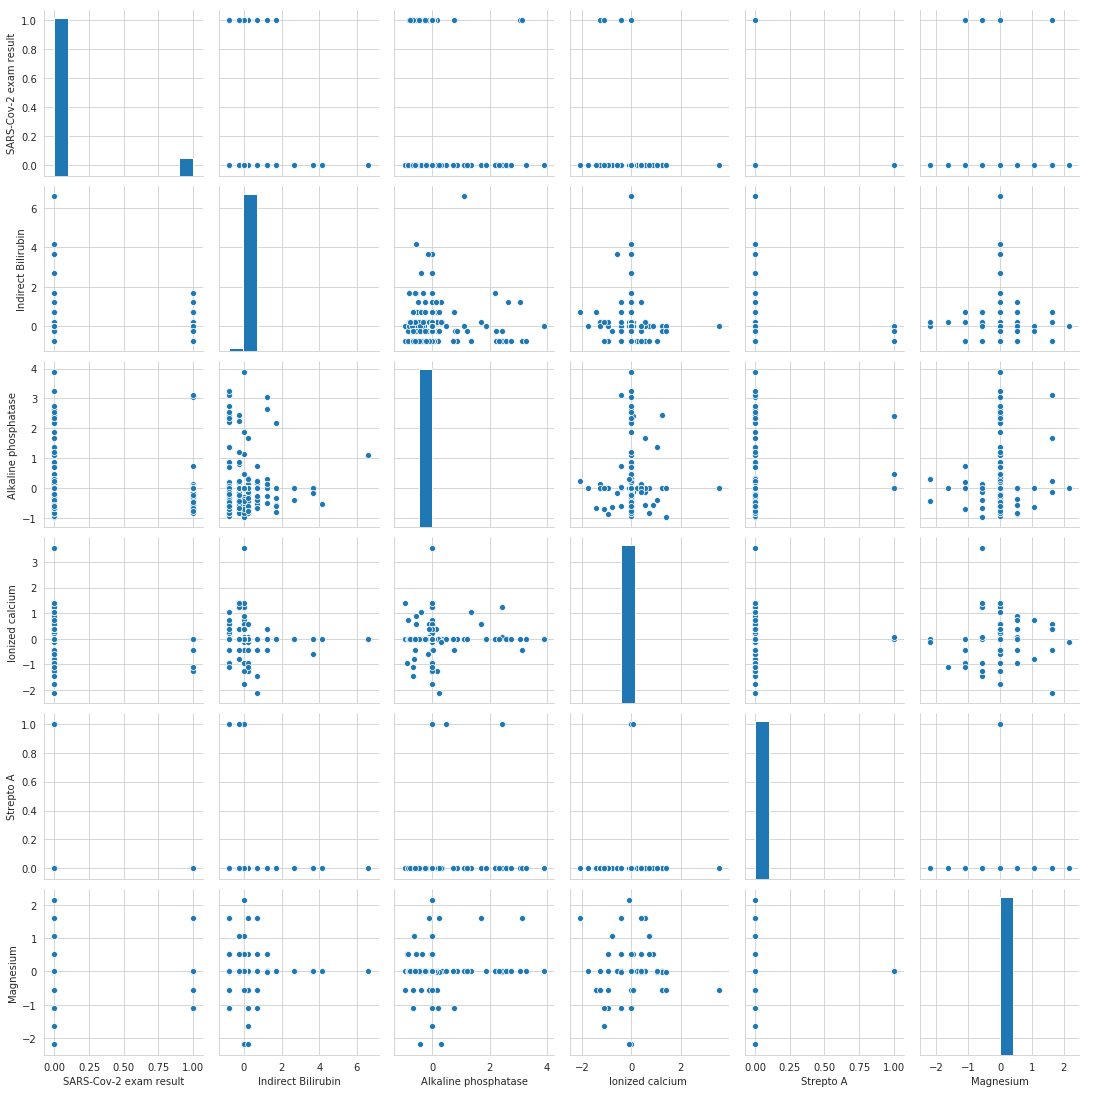

In [35]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Indirect Bilirubin', 'Alkaline phosphatase', 'Ionized calcium\xa0', 'Strepto A', 'Magnesium']
sns.pairplot(dados[cols])
plt.show()

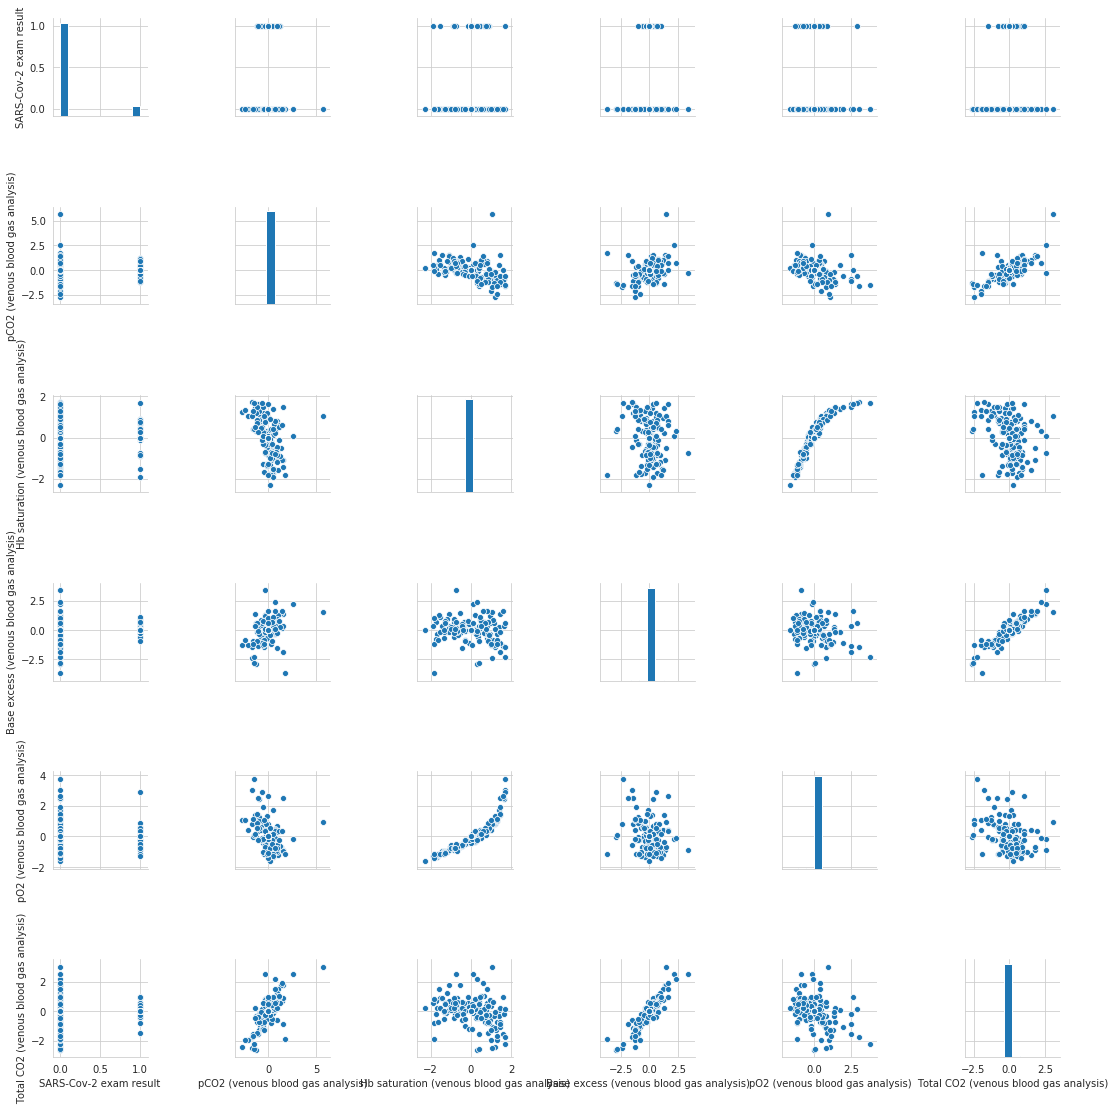

In [36]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','pCO2 (venous blood gas analysis)', 'Hb saturation (venous blood gas analysis)', 'Base excess (venous blood gas analysis)', 'pO2 (venous blood gas analysis)', 'Total CO2 (venous blood gas analysis)']
sns.pairplot(dados[cols])
plt.show()

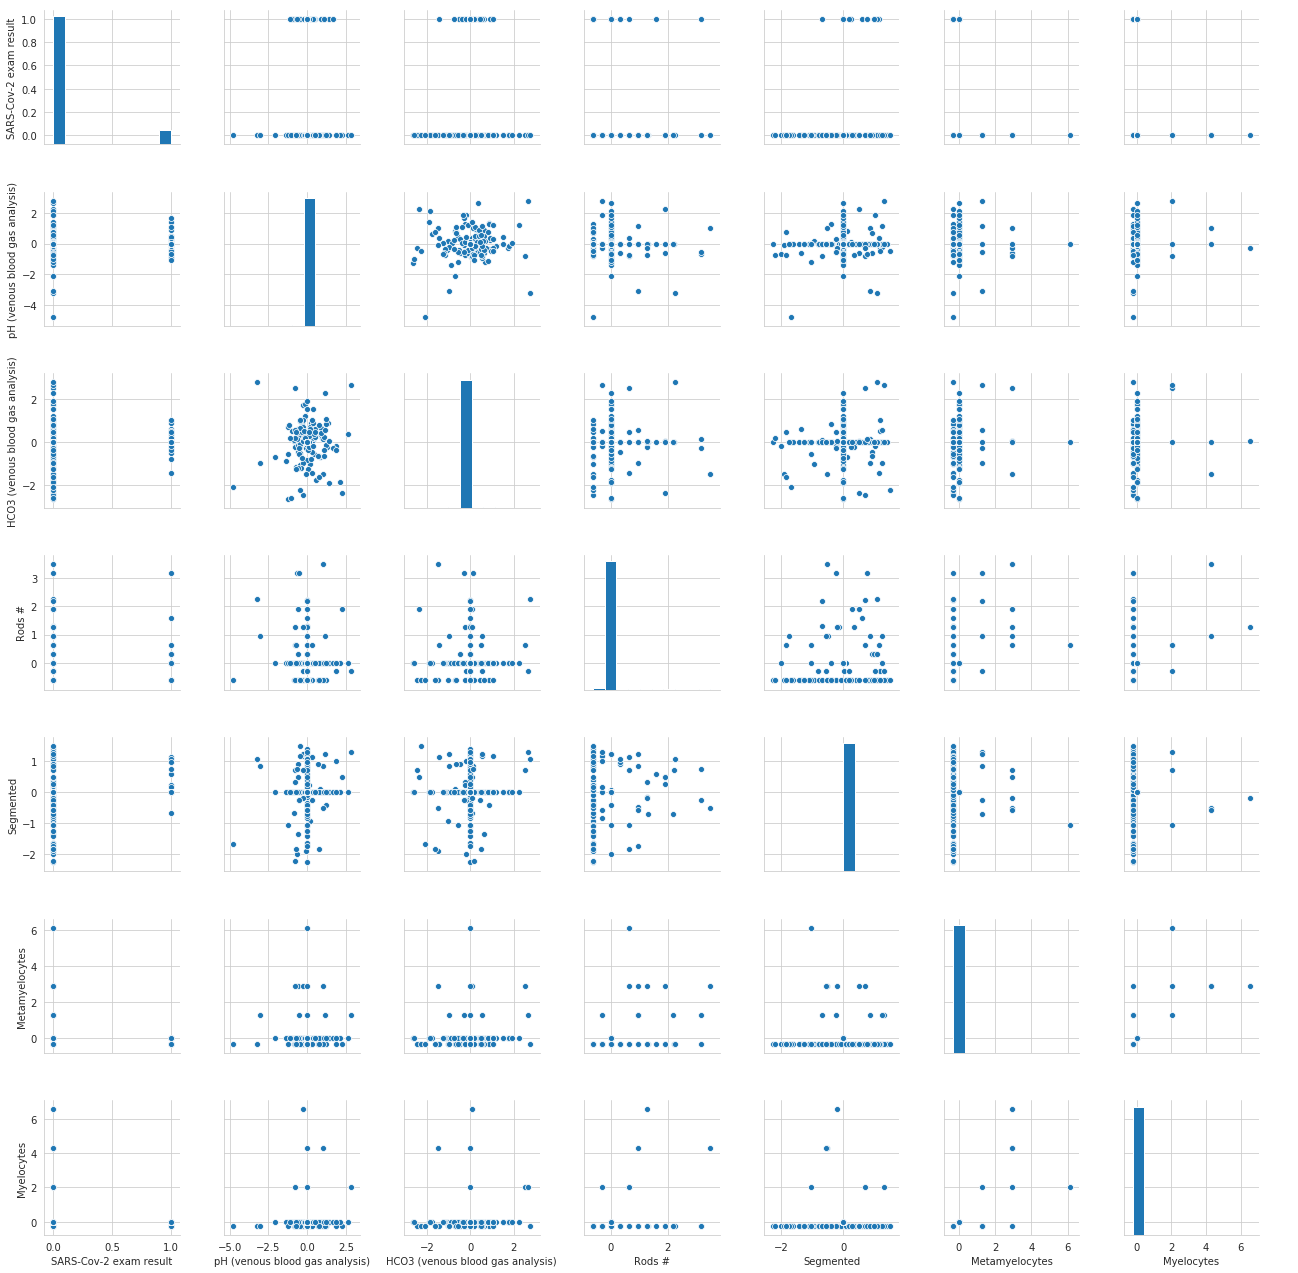

In [37]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','pH (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)', 'Rods #', 'Segmented', 'Metamyelocytes', 'Myelocytes']
sns.pairplot(dados[cols])
plt.show()

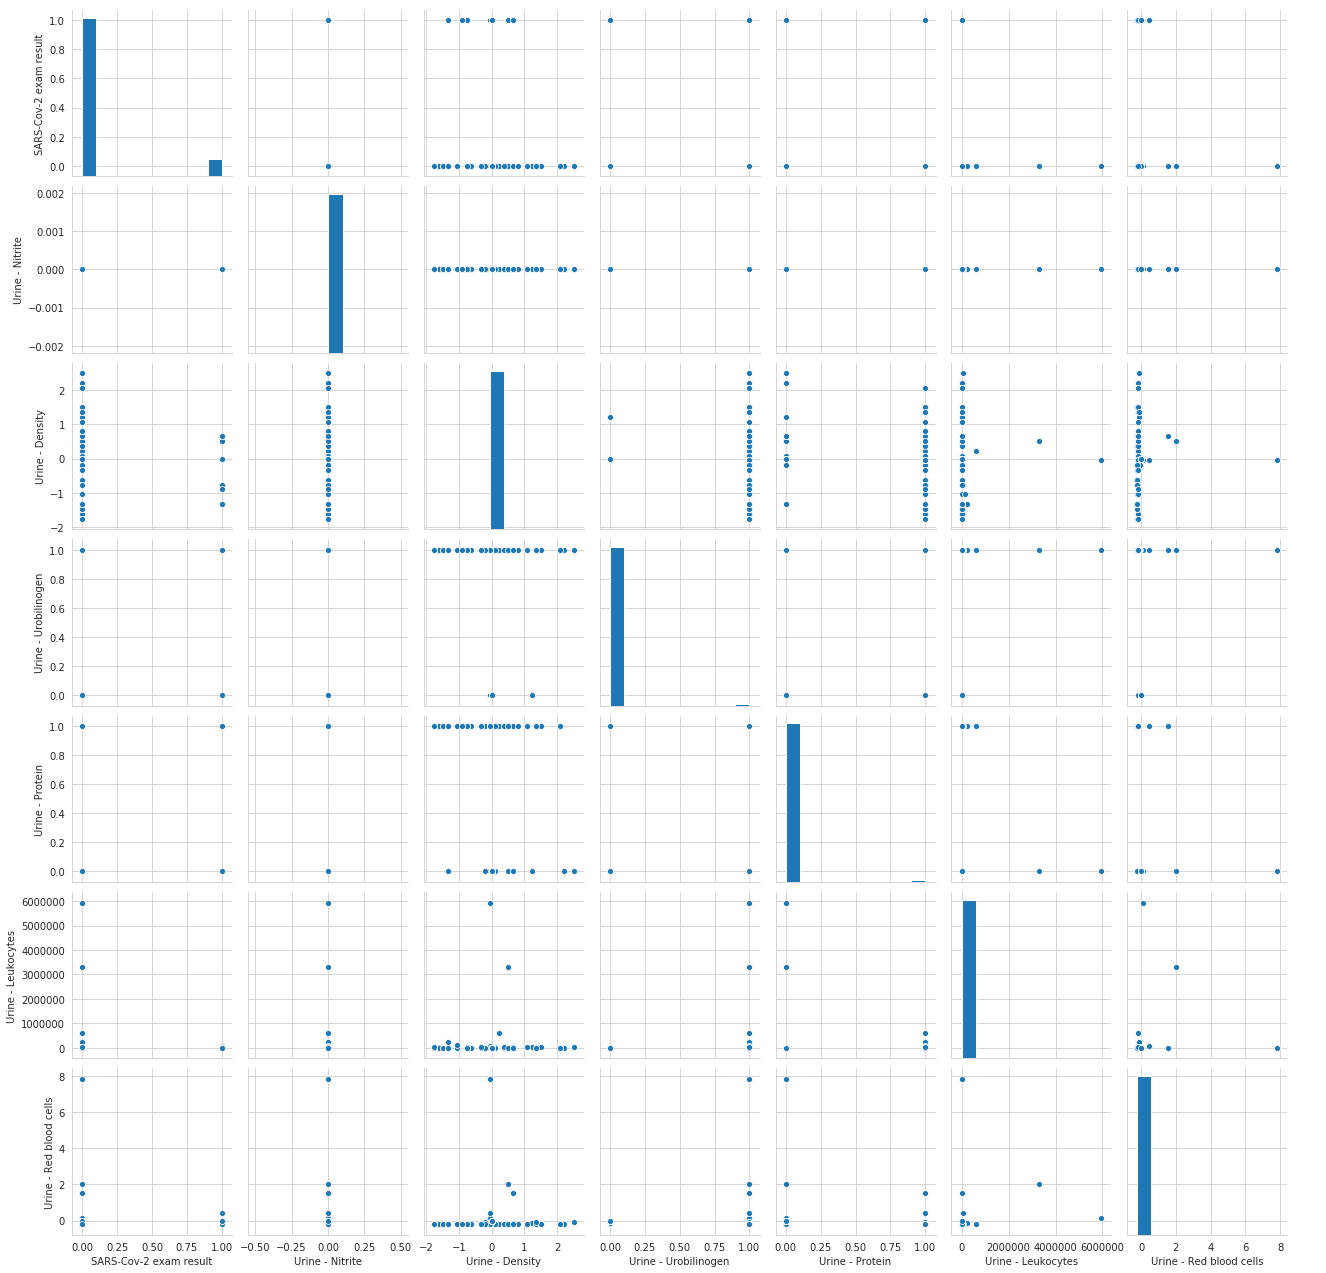

In [38]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Urine - Nitrite', 'Urine - Density', 'Urine - Urobilinogen', 'Urine - Protein', 'Urine - Leukocytes', 'Urine - Red blood cells']
sns.pairplot(dados[cols])
plt.show()

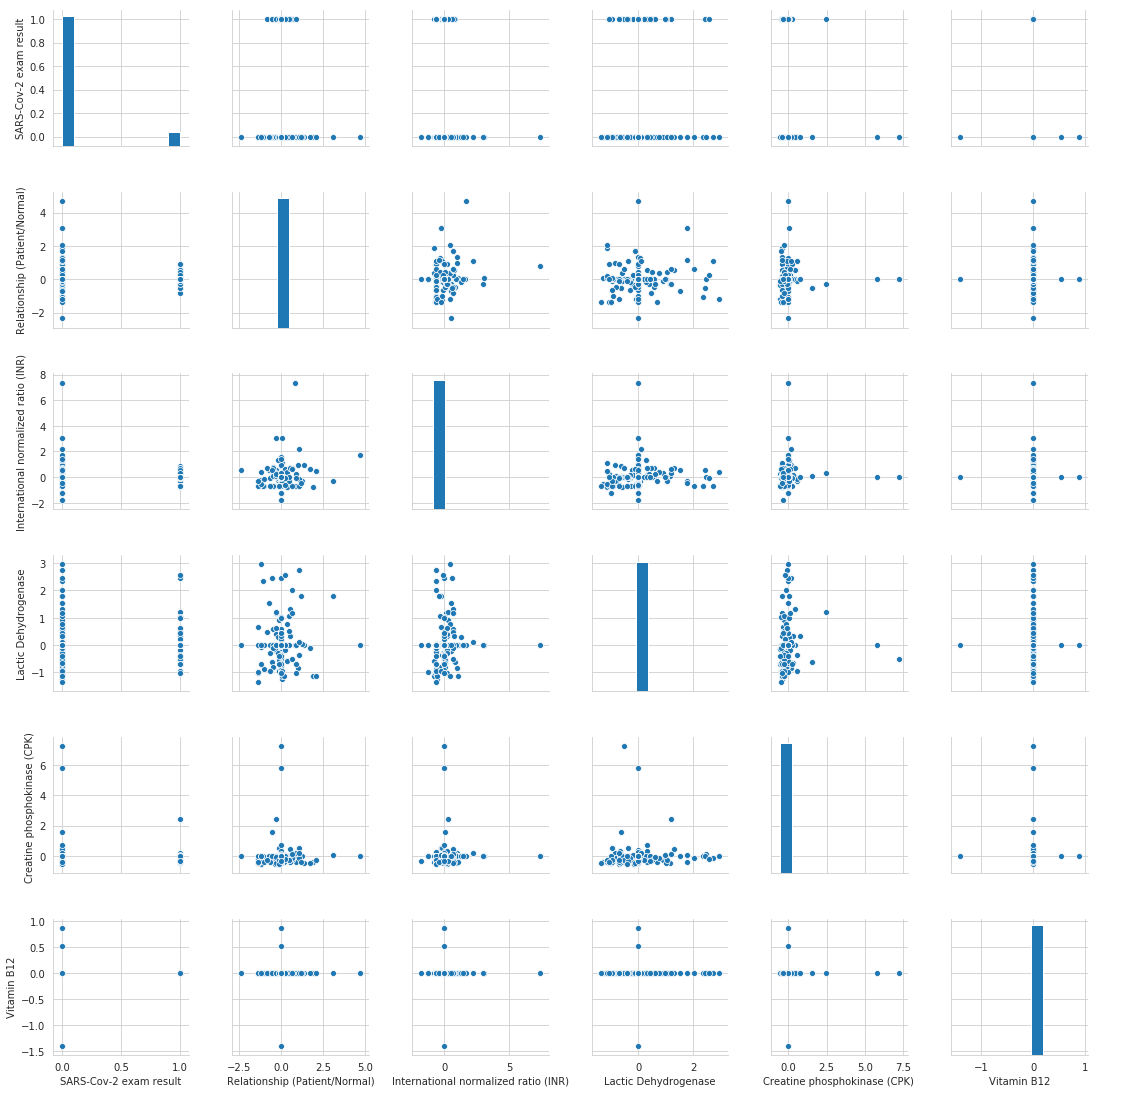

In [39]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Relationship (Patient/Normal)', 'International normalized ratio (INR)', 'Lactic Dehydrogenase', 'Creatine phosphokinase\xa0(CPK)\xa0', 'Vitamin B12']
sns.pairplot(dados[cols])
plt.show()

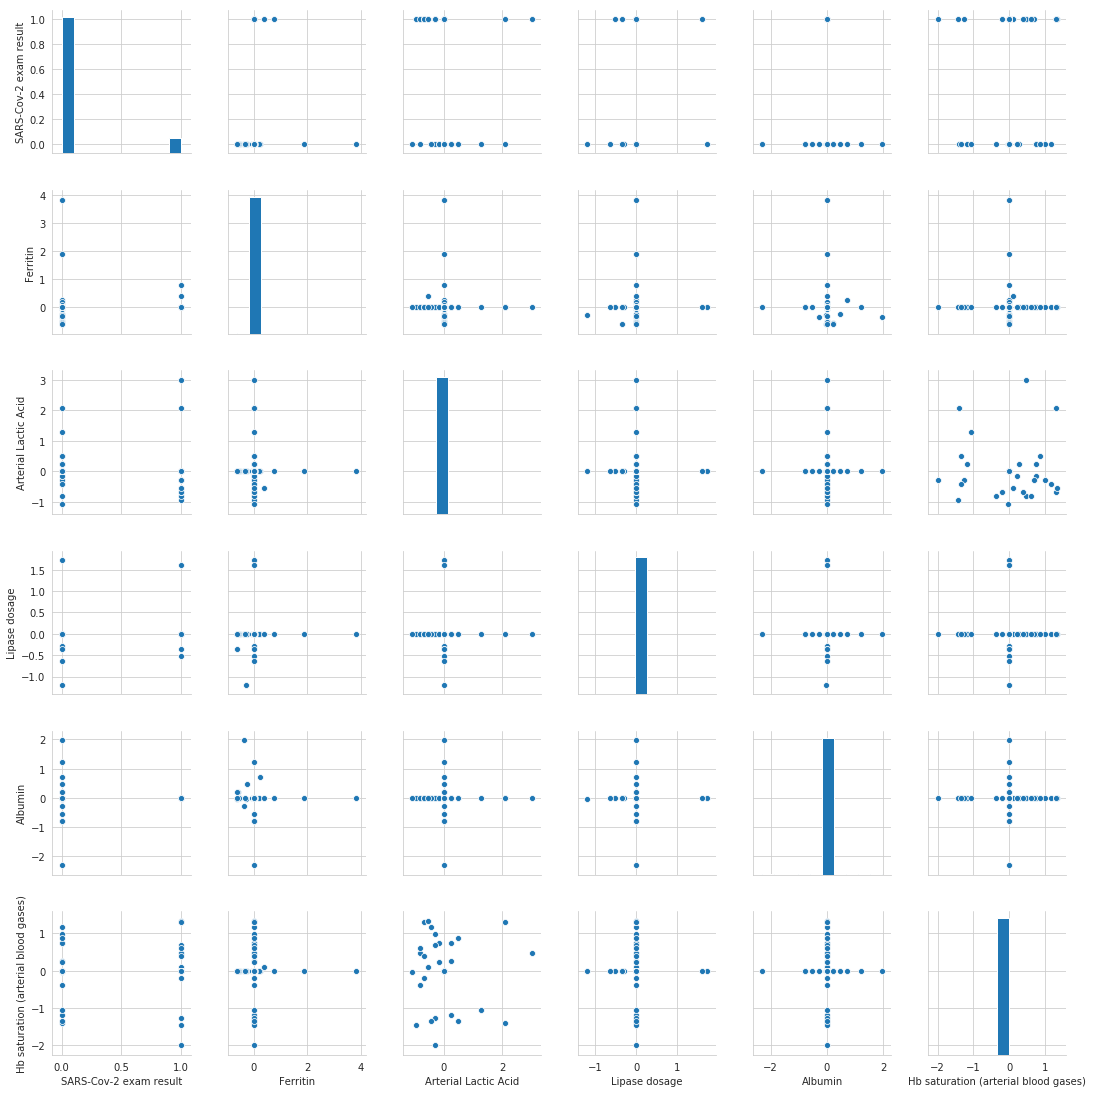

In [40]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','Ferritin', 'Arterial Lactic Acid', 'Lipase dosage', 'Albumin', 'Hb saturation (arterial blood gases)']
sns.pairplot(dados[cols])
plt.show()

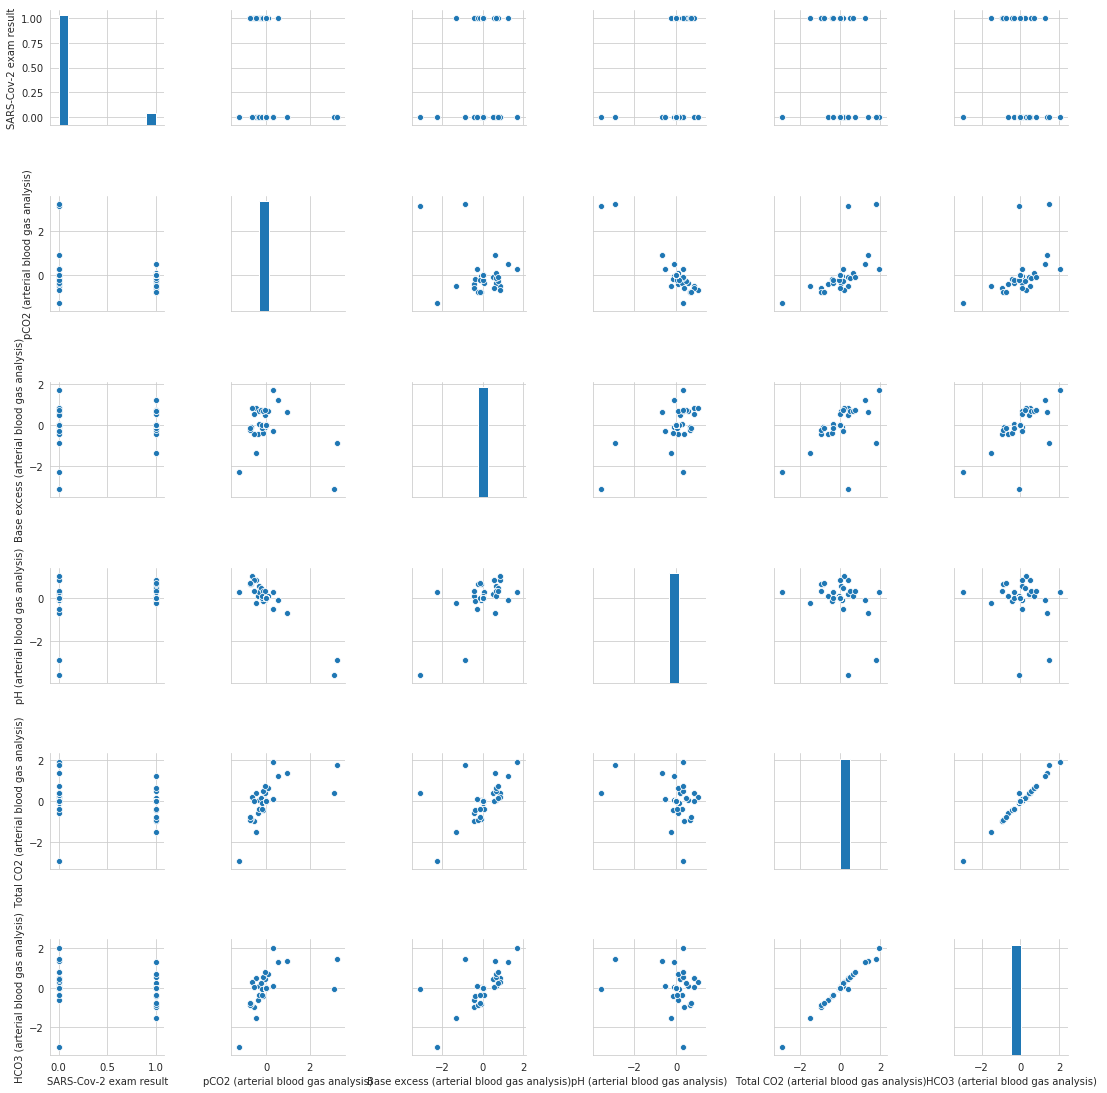

In [41]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','pCO2 (arterial blood gas analysis)', 'Base excess (arterial blood gas analysis)', 'pH (arterial blood gas analysis)', 'Total CO2 (arterial blood gas analysis)', 'HCO3 (arterial blood gas analysis)']
sns.pairplot(dados[cols])
plt.show()

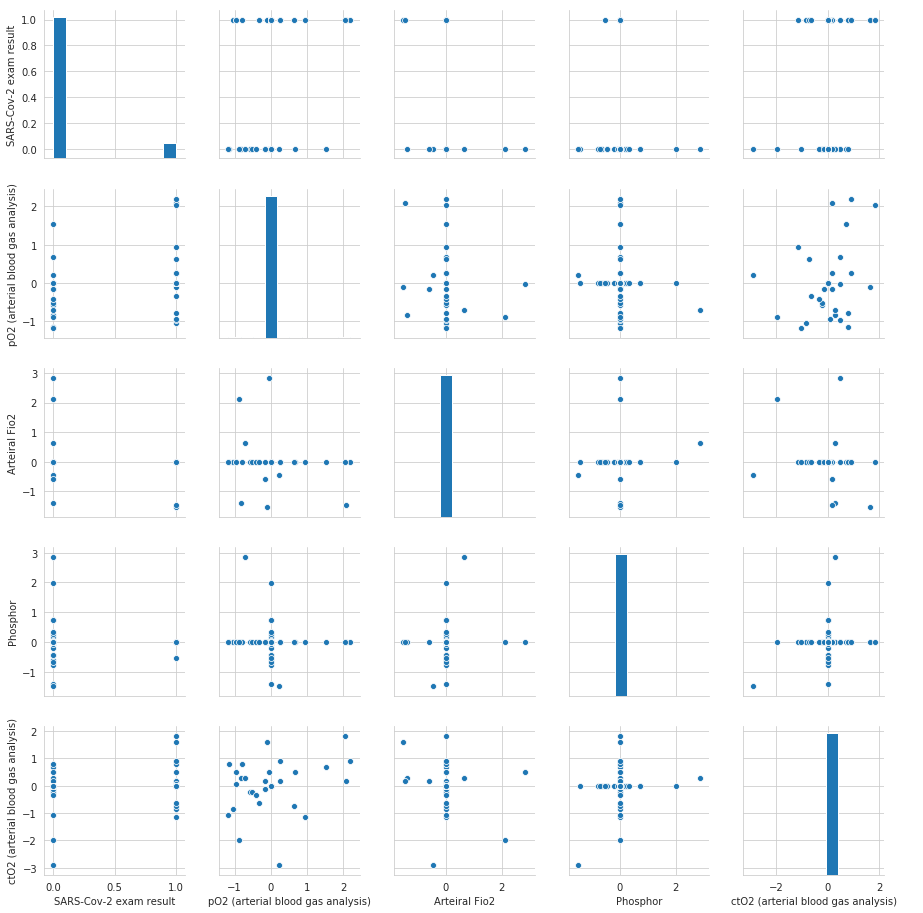

In [42]:
sns.set_style('whitegrid')
cols = ['SARS-Cov-2 exam result','pO2 (arterial blood gas analysis)', 'Arteiral Fio2', 'Phosphor', 'ctO2 (arterial blood gas analysis)']
sns.pairplot(dados[cols])
plt.show()

In [43]:
def bar_chart(feature):
    positivo = dados[dados['SARS-Cov-2 exam result']==1][feature].value_counts()
    negativo = dados[dados['SARS-Cov-2 exam result']==0][feature].value_counts()
    df = pd.DataFrame([positivo,negativo])
    df.index = ['positivo','negativo']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

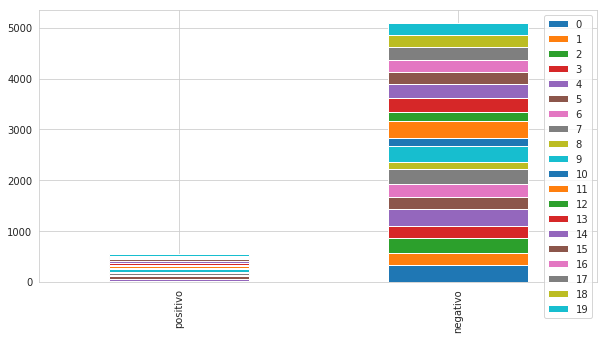

In [44]:
bar_chart('Patient age quantile')

In [45]:
dados.groupby('SARS-Cov-2 exam result')[u'Patient age quantile'].value_counts()

SARS-Cov-2 exam result  Patient age quantile
0                       11                      340
                        0                       333
                        4                       319
                        9                       315
                        2                       310
                        7                       289
                        13                      283
                        14                      260
                        5                       250
                        16                      250
                        6                       248
                        17                      244
                        19                      238
                        3                       234
                        15                      234
                        18                      233
                        1                       232
                        12                      171
                   

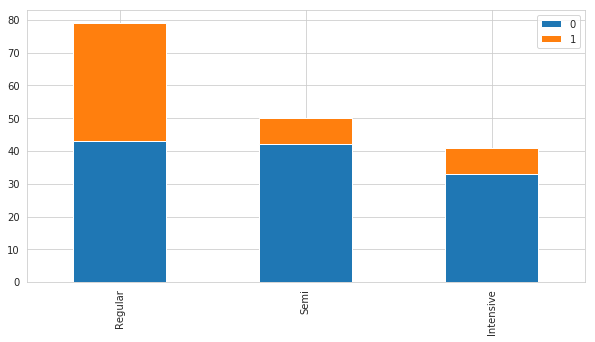

In [46]:
add_regular = dados[dados['Patient addmited to regular ward (1=yes, 0=no)']==1]['SARS-Cov-2 exam result'].value_counts()
add_semi = dados[dados['Patient addmited to semi-intensive unit (1=yes, 0=no)']==1]['SARS-Cov-2 exam result'].value_counts()
add_intensive = dados[dados['Patient addmited to intensive care unit (1=yes, 0=no)']==1]['SARS-Cov-2 exam result'].value_counts()
df = pd.DataFrame([add_regular, add_semi, add_intensive])
df.index = ['Regular','Semi', 'Intensive']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Resultados de exames positivo de SARS-Cov-2 em pacientes adimitidos em Regular, Semi e Intensive   

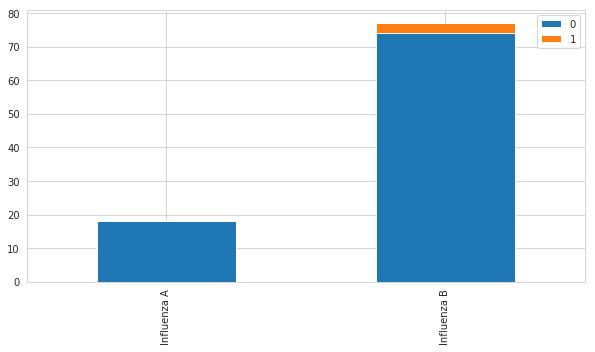

In [47]:
#bar_chart('Influenza A')

influA = dados[dados['Influenza A']==1]['SARS-Cov-2 exam result'].value_counts()
influB = dados[dados['Influenza B']==1]['SARS-Cov-2 exam result'].value_counts()
df = pd.DataFrame([influA, influB])
df.index = ['Influenza A','Influenza B']
df.plot(kind='bar',stacked=True, figsize=(10,5))

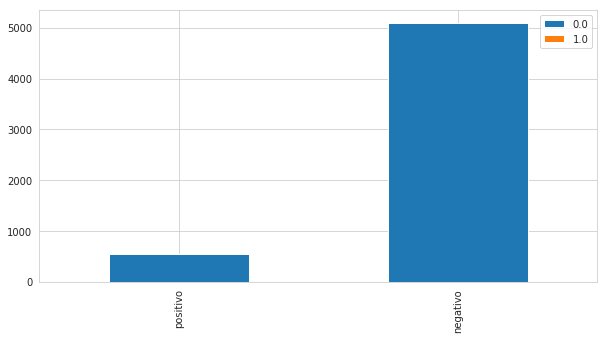

In [48]:
bar_chart('Parainfluenza 1')

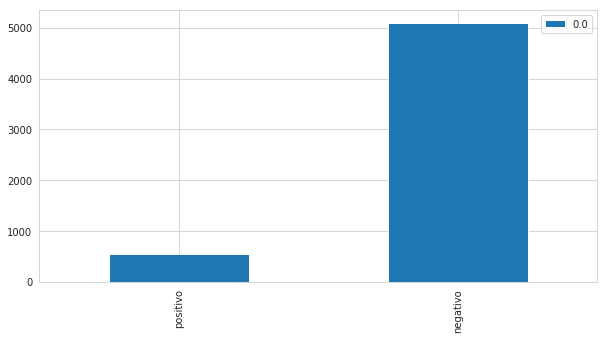

In [49]:
bar_chart('Parainfluenza 2')

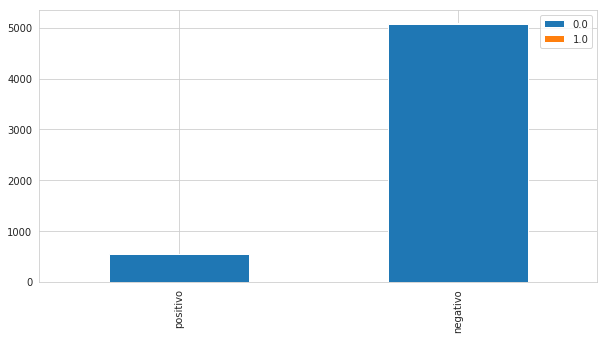

In [50]:
bar_chart('Parainfluenza 3')

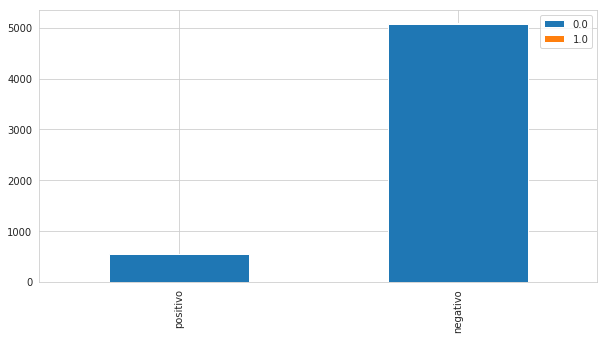

In [51]:
bar_chart('Parainfluenza 4')

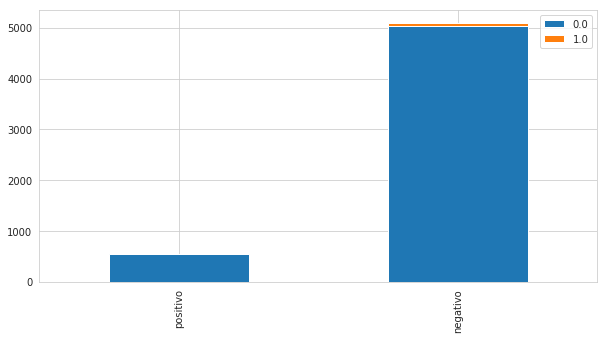

In [52]:
bar_chart('Respiratory Syncytial Virus')

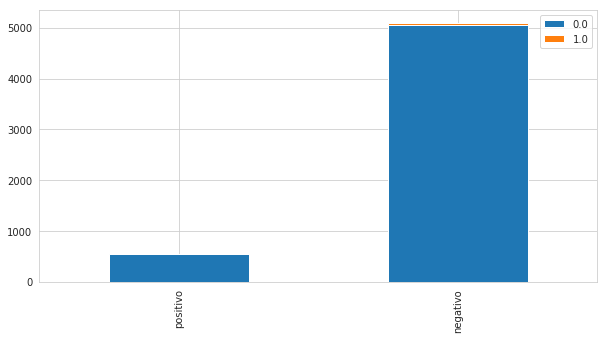

In [53]:
bar_chart('CoronavirusNL63')

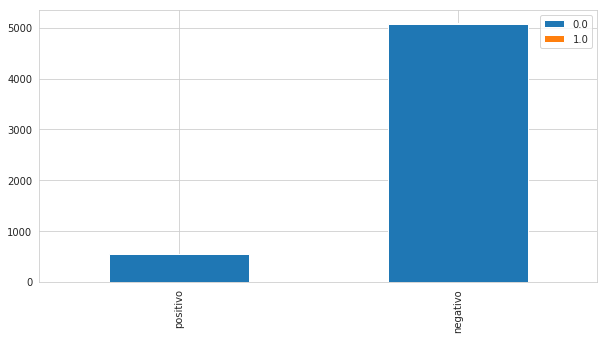

In [54]:
bar_chart('Coronavirus HKU1')

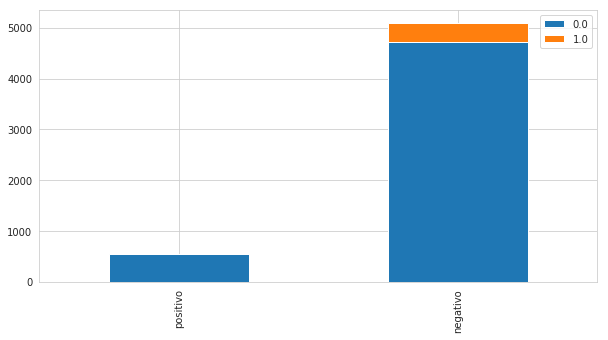

In [55]:
bar_chart('Rhinovirus/Enterovirus')

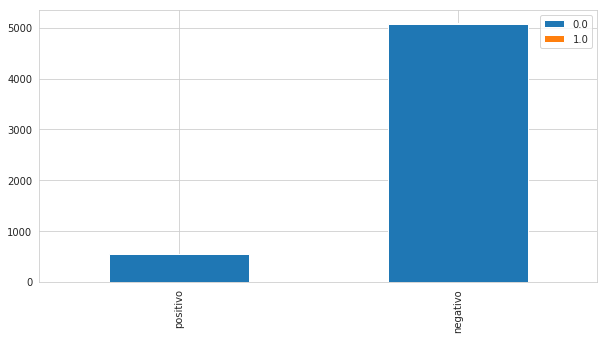

In [56]:
bar_chart('Chlamydophila pneumoniae')

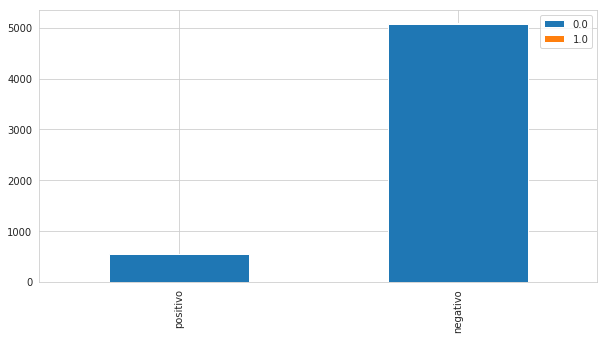

In [57]:
bar_chart('Adenovirus')

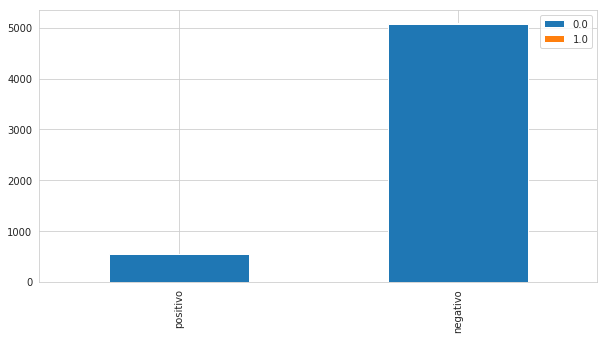

In [58]:
bar_chart('Coronavirus229E')

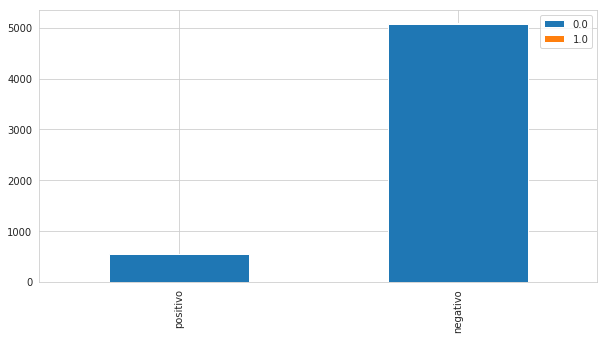

In [59]:
bar_chart('CoronavirusOC43')

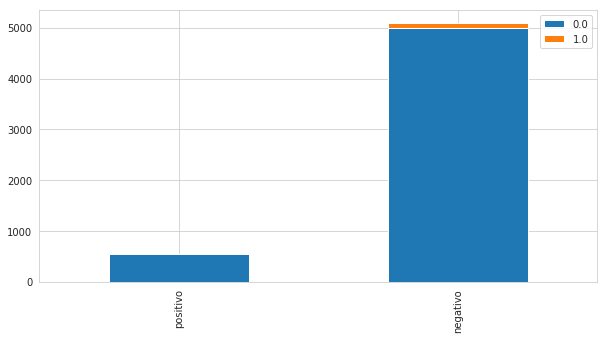

In [60]:
bar_chart('Inf A H1N1 2009')

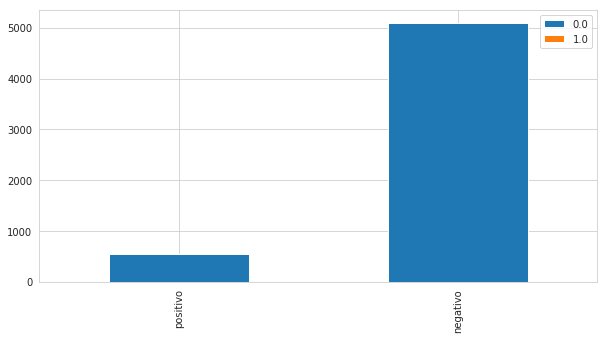

In [61]:
bar_chart('Bordetella pertussis')

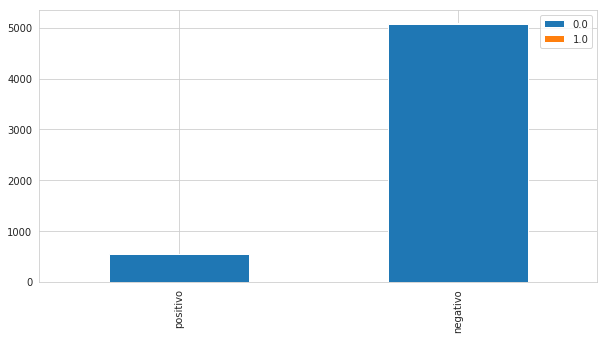

In [62]:
bar_chart('Metapneumovirus')

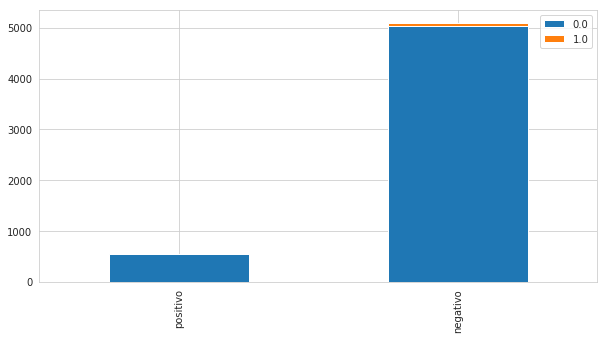

In [63]:
bar_chart('Influenza B, rapid test')

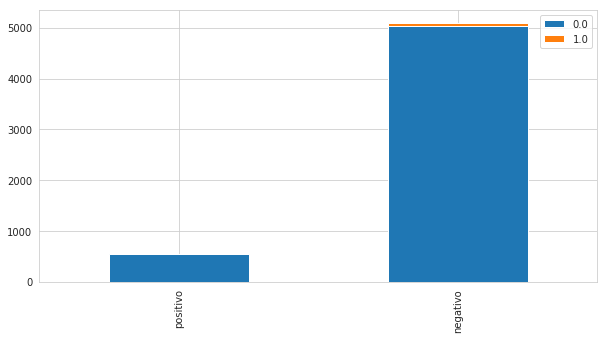

In [64]:
bar_chart('Influenza A, rapid test')

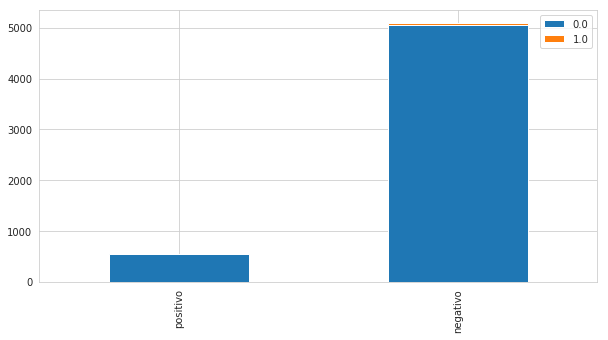

In [65]:
bar_chart('Strepto A')

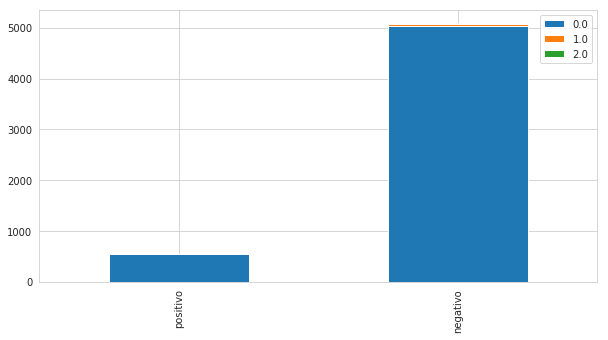

In [66]:
bar_chart('Urine - Hemoglobin')

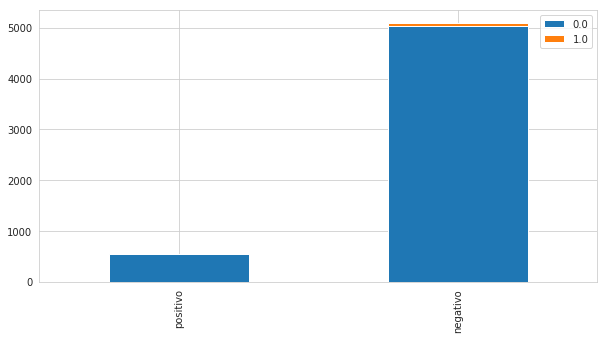

In [67]:
bar_chart('Urine - Esterase')

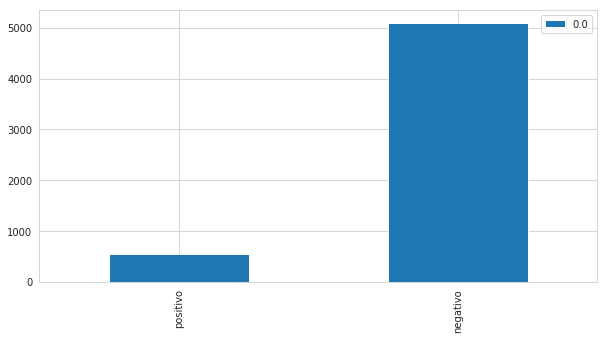

In [68]:
bar_chart('Urine - pH')

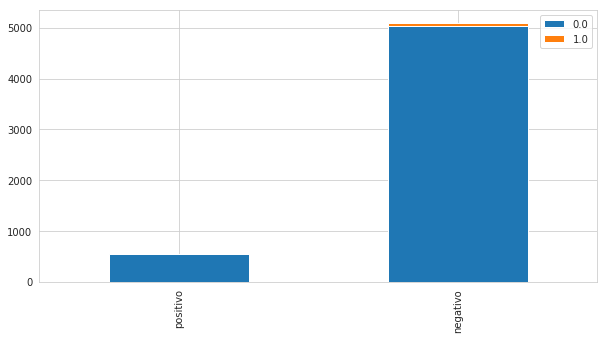

In [69]:
bar_chart('Urine - Bile pigments')

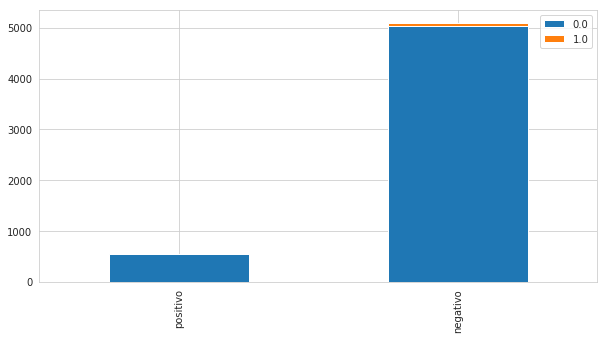

In [70]:
bar_chart('Urine - Ketone Bodies')

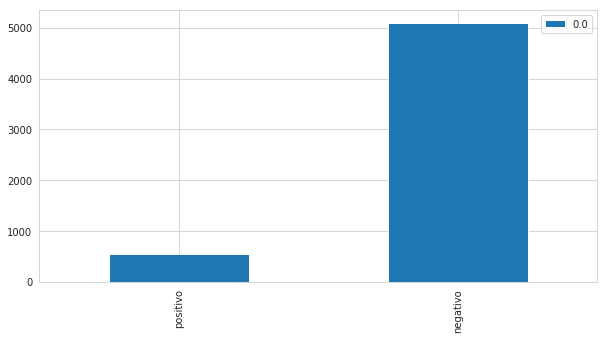

In [71]:
bar_chart('Urine - Nitrite')

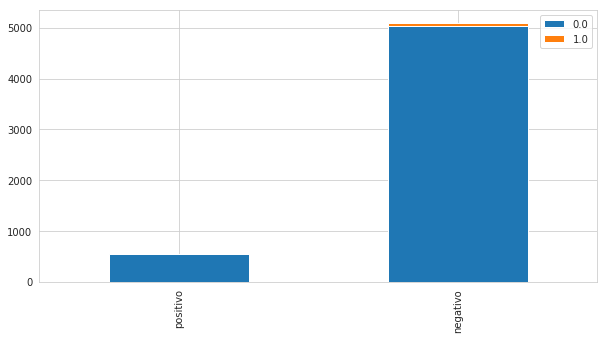

In [72]:
bar_chart('Urine - Protein')

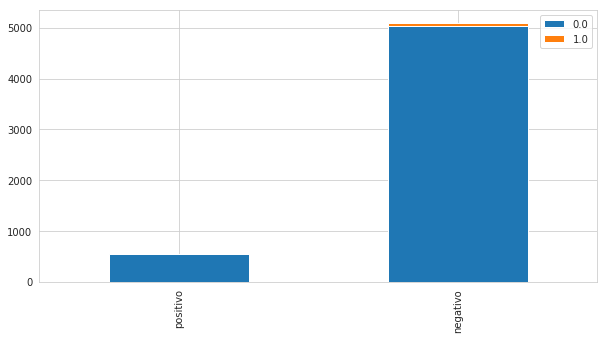

In [73]:
bar_chart('Urine - Hyaline cylinders')

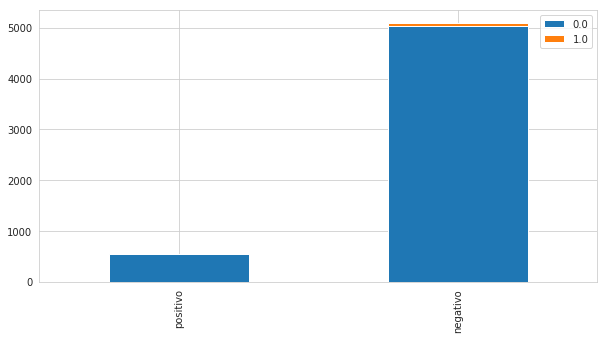

In [74]:
bar_chart('Urine - Granular cylinders')

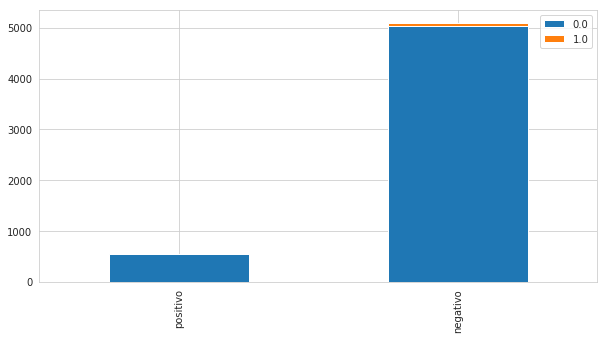

In [75]:
bar_chart('Urine - Yeasts')

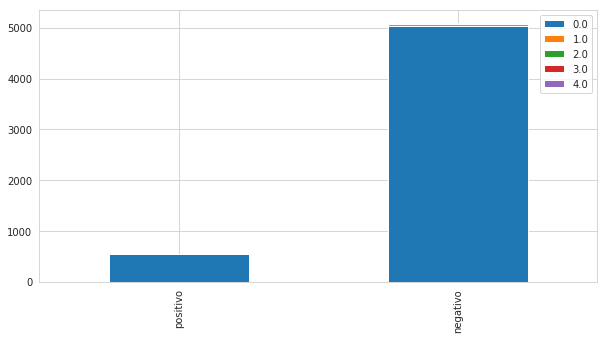

In [76]:
bar_chart('Urine - Aspect')

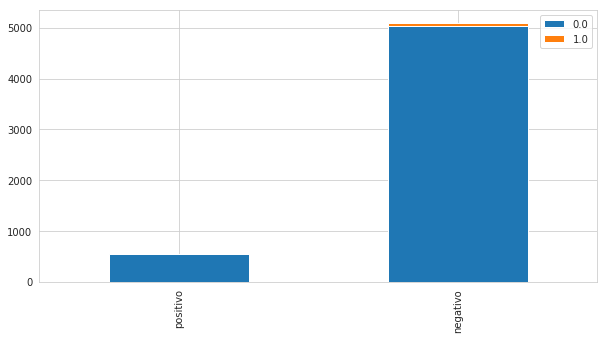

In [77]:
bar_chart('Urine - Urobilinogen')

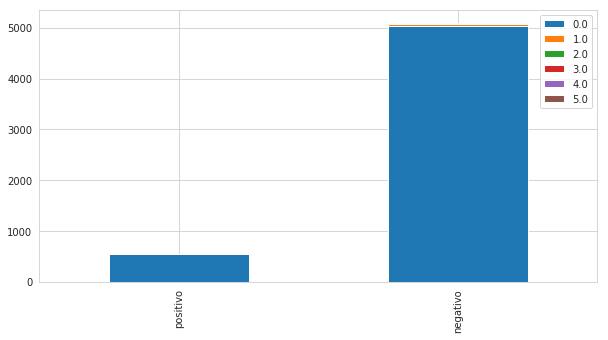

In [78]:
bar_chart('Urine - Crystals')

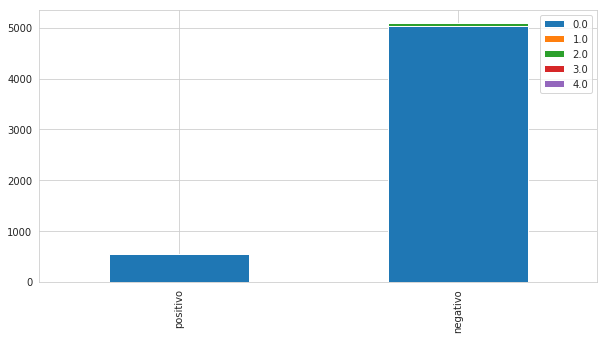

In [79]:
bar_chart('Urine - Color')

# CORRELAÇÕES E DEFINIÇÃO DAS VARIÁVEIS IMPORTANTES PARA O MODELO

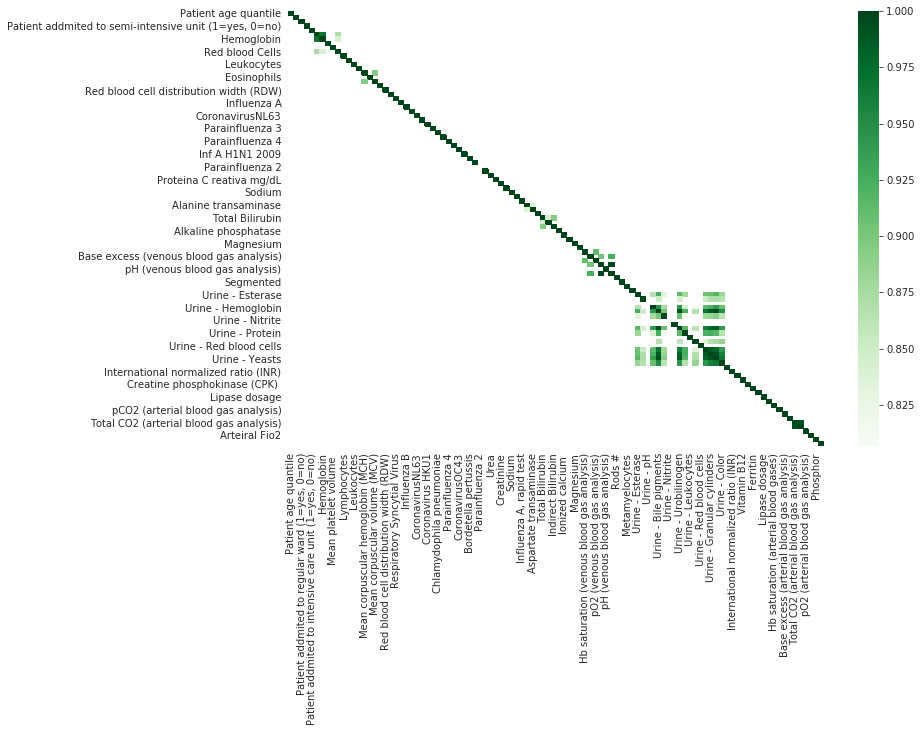

In [80]:
corr = dados.corr()

dados_corr = corr[corr>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(dados_corr, cmap="Greens")

In [81]:
dados_matrix = dados.corr().abs()
dados_corr_var = np.where(dados_matrix>0.8)
dados_corr_var=[(dados_matrix.columns[x],dados_matrix.columns[y]) for x,y in zip(*dados_corr_var) if x!=y and x<y]

In [82]:
list(dados_corr_var)

[('Hematocrit', 'Hemoglobin'),
 ('Hematocrit', 'Red blood Cells'),
 ('Hemoglobin', 'Red blood Cells'),
 ('Mean corpuscular hemoglobin (MCH)', 'Mean corpuscular volume (MCV)'),
 ('Alanine transaminase', 'Aspartate transaminase'),
 ('Total Bilirubin', 'Direct Bilirubin'),
 ('Total Bilirubin', 'Indirect Bilirubin'),
 ('Hb saturation (venous blood gas analysis)',
  'pO2 (venous blood gas analysis)'),
 ('Base excess (venous blood gas analysis)',
  'Total CO2 (venous blood gas analysis)'),
 ('Base excess (venous blood gas analysis)',
  'HCO3 (venous blood gas analysis)'),
 ('Total CO2 (venous blood gas analysis)', 'HCO3 (venous blood gas analysis)'),
 ('Urine - Esterase', 'Urine - Hemoglobin'),
 ('Urine - Esterase', 'Urine - Bile pigments'),
 ('Urine - Esterase', 'Urine - Ketone Bodies'),
 ('Urine - Esterase', 'Urine - Urobilinogen'),
 ('Urine - Esterase', 'Urine - Protein'),
 ('Urine - Esterase', 'Urine - Hyaline cylinders'),
 ('Urine - Esterase', 'Urine - Granular cylinders'),
 ('Urine - E

In [83]:
dados['SARS-Cov-2 exam result'].value_counts()

0    5086
1     558
Name: SARS-Cov-2 exam result, dtype: int64

In [84]:
dados_exames_positivos = dados.loc[dados['SARS-Cov-2 exam result']==1]
dados_exames_negativos = dados.loc[dados['SARS-Cov-2 exam result']==0]
dados_exames_positivos.drop('Patient ID', axis = 1, inplace=True)
dados_exames_negativos.drop('Patient ID', axis = 1, inplace=True)

In [85]:
dados_exames_positivos.shape

(558, 102)

In [86]:
dados_exames_negativos.shape

(5086, 102)

In [87]:
dados_exames_negativos

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,15,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5637,12,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5638,14,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5640,17,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5641,4,0,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
dados_exames_negativos['Hemoglobin'].value_counts()

 0.000000    4566
-0.460932      21
-0.335620      20
 0.416252      19
-0.147652      17
             ... 
 2.295932       1
 2.671868       1
 1.919995       1
-3.343107       1
-3.593731       1
Name: Hemoglobin, Length: 85, dtype: int64

In [89]:
dados_exames_negativos = dados_exames_negativos.loc[dados_exames_negativos['Hemoglobin'] !=0]

In [90]:
dados_exames_negativos['Hemoglobin'].value_counts()

-0.460932    21
-0.335620    20
 0.416252    19
-0.147652    17
-0.084996    16
             ..
-2.403267     1
-3.343107     1
-2.215300     1
-3.593731     1
-2.779203     1
Name: Hemoglobin, Length: 84, dtype: int64

In [91]:
dados_exames_negativos.shape

(520, 102)

In [92]:
base = dados_exames_negativos.append(dados_exames_positivos, ignore_index=True, sort=False)

In [93]:
base.shape

(1078, 102)

In [94]:
base

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,17,0,0,0,0,0.236515,-0.022340,-0.517413,0.010677,0.102004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1,0,0,1,0,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730393,0.0
2,9,0,0,0,0,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,11,0,0,0,0,0.991838,0.792188,0.072992,-0.550290,0.542763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,9,0,0,0,0,0.190738,-0.147652,-0.668155,1.020415,-0.127191,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,16,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1074,4,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1075,15,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1076,3,1,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [95]:
dados_modelo = base[['Influenza B','Respiratory Syncytial Virus',
                      'CoronavirusNL63','Coronavirus HKU1','Rhinovirus/Enterovirus','Chlamydophila pneumoniae','Adenovirus',
                      'Coronavirus229E','CoronavirusOC43','Inf A H1N1 2009','Metapneumovirus','Influenza B, rapid test',
                      'Influenza A, rapid test','Strepto A','Hemoglobin','Red blood Cells','Hematocrit','Platelets',
                      'Patient age quantile','Basophils','Lymphocytes','Leukocytes','Hematocrit','SARS-Cov-2 exam result']]

dados_modelo_outros = base[['Mean corpuscular hemoglobin (MCH)','Mean corpuscular volume (MCV)','Alanine transaminase',
                           'Aspartate transaminase','Total Bilirubin','Direct Bilirubin','Indirect Bilirubin',
                           'Hb saturation (venous blood gas analysis)','pO2 (venous blood gas analysis)','Base excess (venous blood gas analysis)',
                           'Total CO2 (venous blood gas analysis)','HCO3 (venous blood gas analysis)','Urine - Esterase',
                           'Urine - Hemoglobin','Urine - Ketone Bodies','Urine - Urobilinogen','Urine - Protein',
                           'Urine - Hyaline cylinders','Urine - Granular cylinders','Urine - Yeasts','Urine - Color',
                           'Urine - Aspect','Urine - Bile pigments','Urine - Crystals','Urine - Ketone Bodies','Urine - Protein',
                           'pH (arterial blood gas analysis)','Total CO2 (arterial blood gas analysis)','HCO3 (arterial blood gas analysis)', 'SARS-Cov-2 exam result']]

#Patient addmited to regular ward (1=yes, 0=no)','Patient addmited to semi-intensive unit (1=yes, 0=no)',
#'Patient addmited to intensive care unit (1=yes, 0=no)',

In [96]:
dados_modelo

,Influenza B,Respiratory Syncytial Virus,CoronavirusNL63,Coronavirus HKU1,Rhinovirus/Enterovirus,Chlamydophila pneumoniae,Adenovirus,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,...,Hemoglobin,Red blood Cells,Hematocrit,Platelets,Patient age quantile,Basophils,Lymphocytes,Leukocytes,Hematocrit,SARS-Cov-2 exam result
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.022340,0.102004,0.236515,-0.517413,17,-0.223767,0.318366,-0.094610,0.236515,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.774212,-0.850035,-1.571682,1.429667,1,-0.223767,-0.005738,0.364550,-1.571682,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,-0.586244,-1.361315,-0.747693,-0.429480,9,0.081693,-1.114514,-0.884923,-0.747693,0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.792188,0.542763,0.991838,0.072992,11,-0.834685,0.045436,-0.211488,0.991838,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.147652,-0.127191,0.190738,-0.668155,9,0.387152,0.002791,-1.132592,0.190738,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,16,0.000000,0.000000,0.000000,0.000000,1
1074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,4,0.000000,0.000000,0.000000,0.000000,1
1075,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,15,0.000000,0.000000,0.000000,0.000000,1
1076,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,3,0.000000,0.000000,0.000000,0.000000,1


# SEPARAÇÃO DOS DADOS (dados_modelo) PARA AS PREDIÇÕES

In [97]:
X = dados_modelo.iloc[:, 1:-1].values    
y = dados_modelo.iloc[:, -1].values

In [98]:
X.shape

(1078, 22)

In [99]:
y.shape

(1078,)

In [100]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [101]:
# Dividindo o dataset em treino e teste. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# Utilizando Árvore de Decisão

In [102]:
tree = DecisionTreeClassifier(max_leaf_nodes=38)
model_tree = tree.fit(X_train, y_train)

In [103]:
resultado_tree = model_tree.predict(X_test)

In [104]:
mean_squared_error(y_test, resultado_tree)

0.10740740740740741

In [105]:
model_tree.score(X_test, y_test)

0.8925925925925926

In [106]:
print("Acurácia para o Modelo Decision Tree: ",accuracy_score(resultado_tree,y_test), "%")

Acurácia para o Modelo Decision Tree:  0.8925925925925926 %


# Utilizando Regressão Logistica

In [107]:
#Iniciando o modelo de regressão logistica
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_train_pred_lg = model.predict(X_train)
y_test_pred_lg = model.predict(X_test)

In [109]:
#Apresentando a acurácia do modelo, o quanto o modelo conseguiu aprender com os dados. 
print("Acurácia para o Modelo Regressão Logistica: ",accuracy_score(y_train_pred_lg, y_train), "%")

Acurácia para o Modelo Regressão Logistica:  0.7673267326732673 %


In [110]:
#Observando o valor de F1-Score, é recomendado que o modelo seja avaliado por este número pois ele é o 
#balanceamento entre a precisão e recall apresentados abaixo:  
print(classification_report(y_train, y_train_pred_lg))

              precision    recall  f1-score   support

           0       0.94      0.54      0.69       382
           1       0.70      0.97      0.81       426

    accuracy                           0.77       808
   macro avg       0.82      0.76      0.75       808
weighted avg       0.82      0.77      0.75       808



[[ 71   3]
 [ 67 129]]


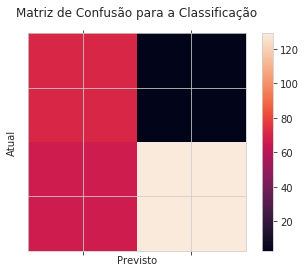

In [111]:
#Observa-se a Matriz de Confusão, valores previsto corretamente (Verdadeiro positivo), valores previsto incorretamente (Falso positivo), 
#valores que não estavamos buscando prever e foi prevista corretamente(Falso verdadeiro) e valores que não estavamos buscando prever foi prevista incorretamente (Falso negativo). 
cm = confusion_matrix(y_test_pred_lg, y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusão para a Classificação')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Previsto')
plt.ylabel('Atual')
plt.show()

# Utilizando NaiveBayes

In [112]:
#Importanto biblioteca do segundo modelo, a Gaussiana é usada para classificaçào e assume-se que segue uma disribuição normal
from sklearn.naive_bayes import GaussianNB

In [113]:
#Executando modelo de predição
NB_sk = GaussianNB()
NB_sk.fit(X_train, y_train)
sk_pred = NB_sk.predict(X_test)

In [114]:
#Definindo uma função para calculo da acurácia, com objetivo de apresentar visualmente em gráficos a dimensão dos dados de 0 a 100000, 
#assim como a faixa de dados testes x previsto.
def accuracy(y_tes, y_pred):
    correct = 0
    for i in range(len(y_pred)):
        if(y_tes[i] == y_pred[i]):
            correct += 1
            
    #Quantidade de Acertos
    return (correct/len(y_tes))*100

In [115]:
print("Acurácia para o Modelo Naive Bayes: ",accuracy_score(sk_pred, y_test), "%")

Acurácia para o Modelo Naive Bayes:  0.6259259259259259 %


# Utilizando Função Sigmoid e de Custo para Probabilidades para comparação aos demais modelos

In [116]:
def sigmoid(z):
  '''
  Retorna o sigmóide, (conhecido como log das probabilidades), o sigmoide inverte o log e retorna o valor original das probabilidades.
  '''
  return 1 / (1 + np.exp(-z))


def predict(features, weights):
  '''
  Retorna uma matriz 1D de probabilidades de que o rótulo da classe seja True / Yes / 1
  O produto escalar dos recursos (Verdadeiro ou Falso) e theta / beta / pesos (B_k) fornecerá o logit (p), que é B0 + B1 Verdadeiro + B2 Falso
  O sigmóide inverte o logit para nos dar p, a probabilidade.
  '''
  return sigmoid( np.dot(features, weights) )

In [117]:
def cost_function_for_all_training_samples(features, labels, weights):
  m = features.shape[0]  # m = número de samples
  predictions = predict(features, weights)
  return -(1/m) * np.sum( labels*np.log(predictions) + (1-labels)*np.log(1-predictions) )

In [118]:
def decision_boundary(probability, threshold=0.5):
  return 1 if probability >= threshold else 0

In [119]:
def calculate_gradient(features, labels, weights):
    predictions = predict(features, weights)
    matrixOfAggregateSlopeOfCostFunction = np.dot(features.T, predictions - labels)
    return matrixOfAggregateSlopeOfCostFunction
  

def update_weights(features, labels, weights, lr):

    matrixOfAggregateSlopeOfCostFunction = calculate_gradient(features, labels, weights)

    m = len(features)
    averageCostDerivativeForEachFeature = matrixOfAggregateSlopeOfCostFunction / m

    gradient = averageCostDerivativeForEachFeature * lr

    return weights - gradient


def fit(features, labels, weights, lr, iterations):

    for i in range(iterations):
        weights = update_weights(features, labels, weights, lr)

        # Processo Log
        if i % 100 == 0:
          cost = cost_function_for_all_training_samples(features, labels, weights)
          print("iteration:", str(i), "cost:", str(cost))

    return weights
  
  
def classify(predictions):
  '''
  input - matriz de elementos N de previsões entre 0 e 1
  output - matriz do elemento N de 0s (False) e 1s (True)
  '''
  decide = np.vectorize(decision_boundary)
  return decide(predictions).flatten()

In [120]:
initial_weights = [0] * X_train.shape[1]
lr = 0.2
iterations = 3001

weights = fit(X_train, y_train, initial_weights, lr, iterations)

iteration: 0 cost: 0.7433261161480432
iteration: 100 cost: 3.531373661970307
iteration: 200 cost: 3.299356215133251
iteration: 300 cost: 3.155431025411057
iteration: 400 cost: 3.060352564561053
iteration: 500 cost: 2.9941024285413973
iteration: 600 cost: 2.94565290010479
iteration: 700 cost: 2.908415607867244
iteration: 800 cost: 2.8784195197140963
iteration: 900 cost: 2.853162721907794
iteration: 1000 cost: 2.831053039751032
iteration: 1100 cost: 2.811105626310664
iteration: 1200 cost: 2.7927294333082777
iteration: 1300 cost: 2.7755686537803026
iteration: 1400 cost: 2.759397262322722
iteration: 1500 cost: 2.7440569453987007
iteration: 1600 cost: 2.729424236710037
iteration: 1700 cost: 2.71539593661112
iteration: 1800 cost: 2.701885026771863
iteration: 1900 cost: 2.688820986838961
iteration: 2000 cost: 2.676150474021428
iteration: 2100 cost: 2.6638365679258578
iteration: 2200 cost: 2.6518563598116334
iteration: 2300 cost: 2.6401974433544235
iteration: 2400 cost: 2.62885411284264
iterat

In [121]:
#Resultado Final do Modelo - Gradient - Sigmoid
y_test_probabilities = predict(X_test, weights).flatten()
y_test_pred = classify(y_test_probabilities)

#accuracy_score(y_test_pred, y_test)

print("Acurácia para o Modelo Gradient Descent: ",accuracy_score(y_test_pred, y_test), "%")

Acurácia para o Modelo Gradient Descent:  0.5814814814814815 %


In [122]:
#Regression scored 0.82 and the scikit learn one scored 0.84.
#For 0, this was slightly more precise, but with worse recall and f1-score. For 1, this was less precise but had a better recall and f1-score.
# Scikit was this:
#                 precision    recall  f1-score   support
#           0       0.88      0.93      0.90      4945
#           1       0.72      0.60      0.65      1568

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.96      0.19      0.32       138
           1       0.54      0.99      0.70       132

    accuracy                           0.58       270
   macro avg       0.75      0.59      0.51       270
weighted avg       0.76      0.58      0.50       270



[[ 26   1]
 [112 131]]


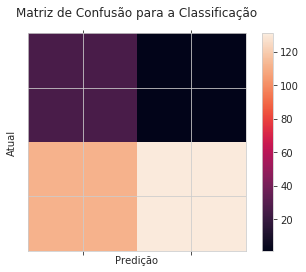

In [123]:
cm = confusion_matrix(y_test_pred, y_test)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Matriz de Confusão para a Classificação')
fig.colorbar(cax)
ax.set_xticklabels([''])
ax.set_yticklabels([''])
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.show()

# Visualizando o resultado com a predição do melhor Árvore de Decisão

In [124]:
comparacao = pd.DataFrame(y_test, columns=["Ocorrido"])
comparacao.insert(loc=1, column="Previsao", value=resultado_tree)
comparacao.head(25)

,Ocorrido,Previsao
0,0,0
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,1,1


In [125]:
comparacao.tail(25)

,Ocorrido,Previsao
245,1,1
246,0,0
247,0,0
248,0,0
249,0,0
250,0,0
251,1,1
252,0,0
253,1,1
254,0,0


Text(0.5, 1.0, 'Previsao: 89.25925925925927%')

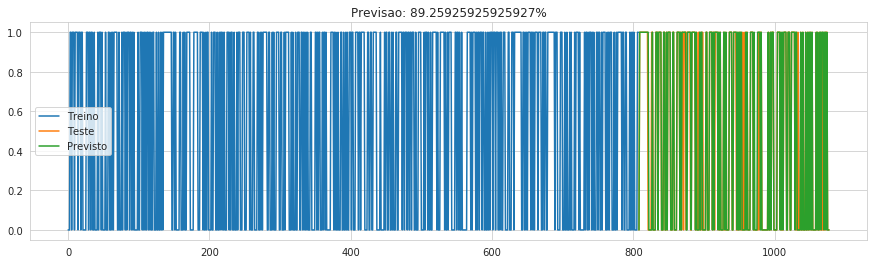

In [126]:
plt.figure(figsize =(15,4))
plt.plot(np.arange(len(y_train)), y_train, label = 'Treino')
plt.plot(np.arange(len(y_train), (len(y_test)+len(y_train)), 1), y_test, label = 'Teste')
plt.plot(np.arange(len(y_train), (len(resultado_tree)+len(y_train)), 1), resultado_tree, label = 'Previsto')
plt.legend(loc = 'best')
plt.title('Previsao: ' + str(accuracy(y_test, resultado_tree)) + '%')

Text(0.5, 1.0, 'Previsao: 89.25925925925927%')

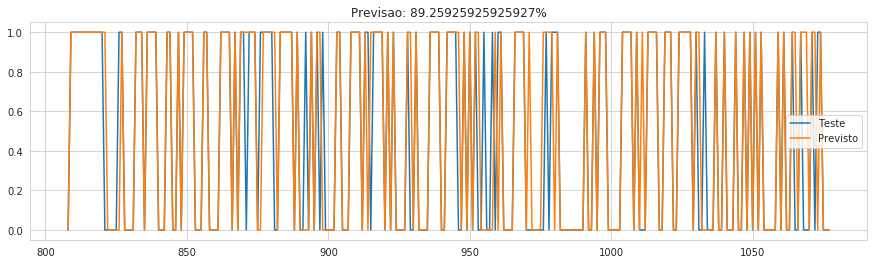

In [127]:
plt.figure(figsize =(15,4))
plt.plot(np.arange(len(y_train), (len(y_test)+len(y_train)), 1), y_test, label = 'Teste')
plt.plot(np.arange(len(y_train), (len(resultado_tree)+len(y_train)), 1), resultado_tree, label = 'Previsto')
plt.legend(loc = 'best')
plt.title('Previsao: ' + str(accuracy(y_test, resultado_tree)) + '%')

Conclusão: 
    
Foi utilizado modelos de aprendizado de máquina para predição sobre os dados de treino e teste,
conforme a normalidade dos dados utilizou-se Regressão Logistica, Gaussiana e Gradient para Classificação e Decision Tree. 
    
Previsao: 89% com Modelo de Árvore de Decisão - Decision Tree. 

Há possibilidade de melhora da acurácia e utilização de outros modelos, o qual será realizado em outra release(versão). 
